Copernicus is the Earth Observation component of the European Union’s space programme (copernicus.eu). Copernicus data offers downloading using MOTU Service, "a Web Server allowing to handle and extract oceanographic huge volumes of data, creating the connection between heterogeneous data providers and end-users" (help.marine.copernicus.eu). More information on MOTU can be accessed [here](https://help.marine.copernicus.eu/en/articles/4796533-what-are-the-motu-apis). You will need to register for a Copernicus account in order to access the data and run this notebook.

We will download the [Level-3 data](https://data.marine.copernicus.eu/product/OCEANCOLOUR_GLO_BGC_L3_MY_009_103/description) non-gap-filled data and the [Level-4 gap-filled daily data](https://data.marine.copernicus.eu/product/OCEANCOLOUR_GLO_BGC_L4_MY_009_104).

* [Daily Level 3 chl data](https://data.marine.copernicus.eu/product/OCEANCOLOUR_GLO_BGC_L3_MY_009_103/files?subdataset=cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D_202311) id: cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D
* [Daily Level 4 chl data](https://data.marine.copernicus.eu/product/OCEANCOLOUR_GLO_BGC_L4_MY_009_104/files?subdataset=cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D_202311) id: cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D

## Authenticate

Run this once. Afterwards the authentication file will be saved to your home directory.

## Import necessary libraries

In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, glob, subprocess
import copernicusmarine

## Download data

This is an example command to download one day of data. The main command is `copernicus.subset()`. We will be downloading these datasets: cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D and 
cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D.

In [28]:
help(copernicusmarine.subset)

Help on function subset in module copernicusmarine.python_interface.subset:

subset(dataset_url: Optional[str] = None, dataset_id: Optional[str] = None, dataset_version: Optional[str] = None, dataset_part: Optional[str] = None, username: Optional[str] = None, password: Optional[str] = None, variables: Optional[List[str]] = None, minimum_longitude: Optional[float] = None, maximum_longitude: Optional[float] = None, minimum_latitude: Optional[float] = None, maximum_latitude: Optional[float] = None, minimum_depth: Optional[float] = None, maximum_depth: Optional[float] = None, vertical_dimension_as_originally_produced: bool = True, start_datetime: Union[datetime.datetime, str, NoneType] = None, end_datetime: Union[datetime.datetime, str, NoneType] = None, subset_method: Literal['nearest', 'strict'] = 'nearest', output_filename: Optional[str] = None, file_format: Literal['netcdf', 'zarr'] = 'netcdf', service: Optional[str] = None, request_file: Union[pathlib.Path, str, NoneType] = None, outp

In [5]:
copernicusmarine.subset(
   dataset_id = "cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D",
   variables = "",
   start_datetime = "2023-08-21T00:00:00",
   end_datetime = "2023-08-21T00:00:00",
   minimum_longitude = 60,
   maximum_longitude = 80, 
   minimum_latitude = 5,
   maximum_latitude = 25, 
   output_directory = 'data/motu/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D',
   output_filename = '20230821',
   force_download = True,
)

INFO - 2024-07-16T00:50:34Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-16T00:50:34Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-16T00:50:38Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-16T00:50:41Z - Downloading using service arco-geo-series...
INFO - 2024-07-16T00:50:46Z - Estimated size of the dataset file is 2.638 MB.
INFO - 2024-07-16T00:50:46Z - Writing to local storage. Please wait...


  0%|          | 0/34 [00:00<?, ?it/s]

INFO - 2024-07-16T00:50:53Z - Successfully downloaded to data/motu/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/20230821.nc


PosixPath('data/motu/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/20230821.nc')

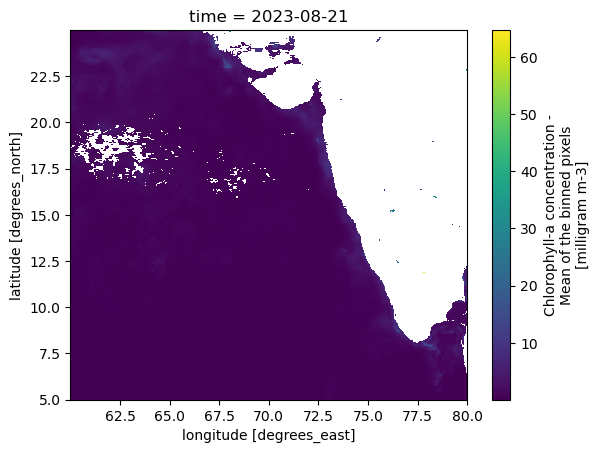

In [6]:
ds = xr.open_dataset('data/motu/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/20230821.nc')
ds['CHL'].sel(time="2023-08-21").plot()

## Load the download function

See bottom of the notebook for a copy of this function. Default is to save the files in `~/shared/data/copernicus` in a folder named by the dataset id.

In [7]:
%run -i "~/indian-ocean-zarr/notebooks/functions.py"

## Download the products

Download and then load and examine a test nc file.

In [21]:
download_copernicus(
    "cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D", 
    "1997-10-01", "2024-06-30"
)

INFO - 2024-07-12T00:39:47Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T00:39:47Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T00:39:51Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T00:39:54Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T00:40:00Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T00:40:00Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T00:40:58Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199710.nc
INFO - 2024-07-12T00:40:59Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T00:40:59Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T00:41:03Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T00:41:06Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T00:41:12Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T00:41:12Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T00:42:14Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199711.nc
INFO - 2024-07-12T00:42:15Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T00:42:15Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T00:42:18Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T00:42:21Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T00:42:27Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T00:42:27Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T00:43:31Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199712.nc
INFO - 2024-07-12T00:43:32Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T00:43:32Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T00:43:35Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T00:43:38Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T00:43:44Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T00:43:44Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T00:44:47Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199801.nc
INFO - 2024-07-12T00:44:49Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T00:44:49Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T00:44:52Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T00:44:55Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T00:45:01Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T00:45:01Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T00:45:59Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199802.nc
INFO - 2024-07-12T00:46:00Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T00:46:00Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T00:46:04Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T00:46:07Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T00:46:14Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T00:46:14Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T00:47:17Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199803.nc
INFO - 2024-07-12T00:47:18Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T00:47:18Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T00:47:21Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T00:47:24Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T00:47:30Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T00:47:30Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T00:48:31Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199804.nc
INFO - 2024-07-12T00:48:33Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T00:48:33Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T00:48:36Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T00:48:39Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T00:48:45Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T00:48:45Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T00:49:48Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199805.nc
INFO - 2024-07-12T00:49:49Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T00:49:49Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T00:49:52Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T00:49:56Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T00:50:02Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T00:50:02Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T00:51:03Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199806.nc
INFO - 2024-07-12T00:51:04Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T00:51:04Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T00:51:07Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T00:51:10Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T00:51:16Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T00:51:16Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T00:52:19Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199807.nc
INFO - 2024-07-12T00:52:20Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T00:52:20Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T00:52:23Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T00:52:26Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T00:52:32Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T00:52:32Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T00:53:36Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199808.nc
INFO - 2024-07-12T00:53:37Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T00:53:37Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T00:53:40Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T00:53:43Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T00:53:49Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T00:53:49Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T00:54:51Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199809.nc
INFO - 2024-07-12T00:54:52Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T00:54:52Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T00:54:55Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T00:54:58Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T00:55:05Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T00:55:05Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T00:56:08Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199810.nc
INFO - 2024-07-12T00:56:09Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T00:56:09Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T00:56:12Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T00:56:15Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T00:56:22Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T00:56:22Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T00:57:19Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199811.nc
INFO - 2024-07-12T00:57:20Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T00:57:20Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T00:57:24Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T00:57:27Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T00:57:32Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T00:57:32Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T00:58:35Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199812.nc
INFO - 2024-07-12T00:58:37Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T00:58:37Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T00:58:40Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T00:58:43Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T00:58:49Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T00:58:49Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T00:59:51Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199901.nc
INFO - 2024-07-12T00:59:52Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T00:59:52Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T00:59:55Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T00:59:58Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:00:04Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T01:00:04Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T01:01:02Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199902.nc
INFO - 2024-07-12T01:01:04Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:01:04Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:01:07Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:01:10Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:01:16Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:01:16Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:02:21Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199903.nc
INFO - 2024-07-12T01:02:22Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:02:22Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:02:25Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:02:28Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:02:34Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T01:02:34Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T01:03:36Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199904.nc
INFO - 2024-07-12T01:03:38Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:03:38Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:03:41Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:03:44Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:03:50Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:03:50Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:04:54Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199905.nc
INFO - 2024-07-12T01:04:55Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:04:55Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:04:58Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:05:01Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:05:07Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T01:05:07Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T01:06:10Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199906.nc
INFO - 2024-07-12T01:06:11Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:06:11Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:06:14Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:06:17Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:06:24Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:06:24Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:07:27Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199907.nc
INFO - 2024-07-12T01:07:29Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:07:29Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:07:32Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:07:34Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:07:41Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:07:41Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:08:45Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199908.nc
INFO - 2024-07-12T01:08:47Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:08:47Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:08:50Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:08:53Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:08:59Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T01:08:59Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T01:10:01Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199909.nc
INFO - 2024-07-12T01:10:02Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:10:02Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:10:04Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:10:07Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:10:14Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:10:14Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:11:19Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199910.nc
INFO - 2024-07-12T01:11:20Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:11:20Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:11:23Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:11:26Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:11:32Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T01:11:32Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T01:12:33Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199911.nc
INFO - 2024-07-12T01:12:35Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:12:35Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:12:38Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:12:41Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:12:46Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:12:46Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:13:49Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199912.nc
INFO - 2024-07-12T01:13:50Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:13:50Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:13:54Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:13:57Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:14:03Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:14:03Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:15:07Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200001.nc
INFO - 2024-07-12T01:15:09Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:15:09Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:15:12Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:15:15Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:15:21Z - Estimated size of the dataset file is 504.945 MB.
INFO - 2024-07-12T01:15:21Z - Writing to local storage. Please wait...


  0%|          | 0/3598 [00:00<?, ?it/s]

INFO - 2024-07-12T01:16:22Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200002.nc
INFO - 2024-07-12T01:16:24Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:16:24Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:16:27Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:16:30Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:16:36Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:16:36Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:17:40Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200003.nc
INFO - 2024-07-12T01:17:41Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:17:41Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:17:44Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:17:48Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:17:53Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T01:17:53Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T01:18:56Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200004.nc
INFO - 2024-07-12T01:18:57Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:18:57Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:19:00Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:19:03Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:19:10Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:19:10Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:20:13Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200005.nc
INFO - 2024-07-12T01:20:15Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:20:15Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:20:18Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:20:21Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:20:27Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T01:20:27Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T01:21:29Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200006.nc
INFO - 2024-07-12T01:21:30Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:21:30Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:21:33Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:21:36Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:21:43Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:21:43Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:22:46Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200007.nc
INFO - 2024-07-12T01:22:47Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:22:47Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:22:50Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:22:53Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:22:58Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:22:58Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:24:02Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200008.nc
INFO - 2024-07-12T01:24:03Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:24:03Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:24:07Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:24:10Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:24:16Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T01:24:16Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T01:25:17Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200009.nc
INFO - 2024-07-12T01:25:19Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:25:19Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:25:22Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:25:25Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:25:32Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:25:32Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:26:35Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200010.nc
INFO - 2024-07-12T01:26:36Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:26:36Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:26:39Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:26:42Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:26:48Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T01:26:48Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T01:27:50Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200011.nc
INFO - 2024-07-12T01:27:51Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:27:51Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:27:54Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:27:57Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:28:02Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:28:02Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:29:06Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200012.nc
INFO - 2024-07-12T01:29:08Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:29:08Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:29:10Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:29:13Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:29:20Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:29:20Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:30:23Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200101.nc
INFO - 2024-07-12T01:30:25Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:30:25Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:30:28Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:30:31Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:30:37Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T01:30:37Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T01:31:35Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200102.nc
INFO - 2024-07-12T01:31:36Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:31:36Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:31:39Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:31:42Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:31:48Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:31:48Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:32:51Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200103.nc
INFO - 2024-07-12T01:32:52Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:32:52Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:32:55Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:32:58Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:33:05Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T01:33:05Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T01:34:07Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200104.nc
INFO - 2024-07-12T01:34:09Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:34:09Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:34:12Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:34:15Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:34:21Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:34:21Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:35:24Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200105.nc
INFO - 2024-07-12T01:35:25Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:35:25Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:35:28Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:35:31Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:35:38Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T01:35:38Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T01:36:39Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200106.nc
INFO - 2024-07-12T01:36:40Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:36:40Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:36:43Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:36:46Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:36:52Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:36:52Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:37:56Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200107.nc
INFO - 2024-07-12T01:37:57Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:37:57Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:38:00Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:38:03Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:38:09Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:38:09Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:39:12Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200108.nc
INFO - 2024-07-12T01:39:14Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:39:14Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:39:17Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:39:20Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:39:26Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T01:39:26Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T01:40:28Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200109.nc
INFO - 2024-07-12T01:40:29Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:40:29Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:40:32Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:40:35Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:40:41Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:40:41Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:41:45Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200110.nc
INFO - 2024-07-12T01:41:46Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:41:46Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:41:49Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:41:52Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:41:58Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T01:41:58Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T01:42:59Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200111.nc
INFO - 2024-07-12T01:43:00Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:43:00Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:43:03Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:43:06Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:43:12Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:43:12Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:44:15Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200112.nc
INFO - 2024-07-12T01:44:17Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:44:17Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:44:20Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:44:23Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:44:29Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:44:29Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:45:33Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200201.nc
INFO - 2024-07-12T01:45:34Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:45:34Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:45:37Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:45:40Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:45:46Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T01:45:46Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T01:46:44Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200202.nc
INFO - 2024-07-12T01:46:46Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:46:46Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:46:49Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:46:52Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:46:58Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:46:58Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:48:02Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200203.nc
INFO - 2024-07-12T01:48:03Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:48:03Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:48:06Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:48:09Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:48:16Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T01:48:16Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T01:49:17Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200204.nc
INFO - 2024-07-12T01:49:18Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:49:18Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:49:21Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:49:25Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:49:31Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:49:31Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:50:34Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200205.nc
INFO - 2024-07-12T01:50:35Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:50:35Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:50:39Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:50:42Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:50:49Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T01:50:49Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T01:51:51Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200206.nc
INFO - 2024-07-12T01:51:52Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:51:52Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:51:55Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:51:59Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:52:05Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:52:05Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:53:09Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200207.nc
INFO - 2024-07-12T01:53:10Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:53:10Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:53:13Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:53:17Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:53:23Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:53:23Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:54:26Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200208.nc
INFO - 2024-07-12T01:54:27Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:54:27Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:54:30Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:54:33Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:54:39Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T01:54:39Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T01:55:41Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200209.nc
INFO - 2024-07-12T01:55:42Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:55:42Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:55:45Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:55:48Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:55:55Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:55:55Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:56:58Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200210.nc
INFO - 2024-07-12T01:56:59Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:56:59Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:57:03Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:57:06Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:57:12Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T01:57:12Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T01:58:13Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200211.nc
INFO - 2024-07-12T01:58:14Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:58:14Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:58:17Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:58:20Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:58:27Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:58:27Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T01:59:29Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200212.nc
INFO - 2024-07-12T01:59:31Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T01:59:31Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T01:59:34Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T01:59:37Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T01:59:43Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T01:59:43Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:00:47Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200301.nc
INFO - 2024-07-12T02:00:48Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:00:48Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:00:51Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:00:54Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:01:01Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T02:01:01Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T02:01:58Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200302.nc
INFO - 2024-07-12T02:01:59Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:01:59Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:02:02Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:02:05Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:02:11Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:02:11Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:03:15Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200303.nc
INFO - 2024-07-12T02:03:16Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:03:16Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:03:19Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:03:22Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:03:28Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T02:03:28Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T02:04:29Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200304.nc
INFO - 2024-07-12T02:04:31Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:04:31Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:04:34Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:04:37Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:04:43Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:04:43Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:05:46Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200305.nc
INFO - 2024-07-12T02:05:47Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:05:47Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:05:50Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:05:53Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:06:00Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T02:06:00Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T02:07:01Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200306.nc
INFO - 2024-07-12T02:07:02Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:07:02Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:07:06Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:07:09Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:07:15Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:07:15Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:08:18Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200307.nc
INFO - 2024-07-12T02:08:19Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:08:19Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:08:22Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:08:25Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:08:32Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:08:32Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:09:34Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200308.nc
INFO - 2024-07-12T02:09:36Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:09:36Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:09:39Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:09:42Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:09:48Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T02:09:48Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T02:10:50Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200309.nc
INFO - 2024-07-12T02:10:51Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:10:51Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:10:54Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:10:57Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:11:04Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:11:04Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:12:07Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200310.nc
INFO - 2024-07-12T02:12:08Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:12:08Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:12:11Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:12:14Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:12:20Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T02:12:20Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T02:13:22Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200311.nc
INFO - 2024-07-12T02:13:23Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:13:23Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:13:26Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:13:29Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:13:36Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:13:36Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:14:38Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200312.nc
INFO - 2024-07-12T02:14:39Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:14:39Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:14:42Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:14:45Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:14:51Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:14:51Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:15:56Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200401.nc
INFO - 2024-07-12T02:15:57Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:15:57Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:16:00Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:16:03Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:16:09Z - Estimated size of the dataset file is 504.945 MB.
INFO - 2024-07-12T02:16:09Z - Writing to local storage. Please wait...


  0%|          | 0/3598 [00:00<?, ?it/s]

INFO - 2024-07-12T02:17:08Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200402.nc
INFO - 2024-07-12T02:17:09Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:17:09Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:17:12Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:17:15Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:17:22Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:17:22Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:18:25Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200403.nc
INFO - 2024-07-12T02:18:26Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:18:26Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:18:29Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:18:32Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:18:38Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T02:18:38Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T02:19:40Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200404.nc
INFO - 2024-07-12T02:19:41Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:19:41Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:19:44Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:19:48Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:19:54Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:19:54Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:20:57Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200405.nc
INFO - 2024-07-12T02:20:58Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:20:58Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:21:01Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:21:04Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:21:10Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T02:21:10Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T02:22:12Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200406.nc
INFO - 2024-07-12T02:22:13Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:22:13Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:22:16Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:22:19Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:22:25Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:22:25Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:23:28Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200407.nc
INFO - 2024-07-12T02:23:30Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:23:30Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:23:33Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:23:36Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:23:42Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:23:42Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:24:45Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200408.nc
INFO - 2024-07-12T02:24:46Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:24:46Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:24:50Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:24:53Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:24:59Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T02:24:59Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T02:26:02Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200409.nc
INFO - 2024-07-12T02:26:03Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:26:03Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:26:07Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:26:10Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:26:16Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:26:16Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:27:19Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200410.nc
INFO - 2024-07-12T02:27:20Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:27:20Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:27:23Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:27:26Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:27:33Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T02:27:33Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T02:28:33Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200411.nc
INFO - 2024-07-12T02:28:35Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:28:35Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:28:38Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:28:41Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:28:47Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:28:47Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:29:50Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200412.nc
INFO - 2024-07-12T02:29:51Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:29:51Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:29:55Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:29:58Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:30:04Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:30:04Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:31:07Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200501.nc
INFO - 2024-07-12T02:31:08Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:31:08Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:31:11Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:31:14Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:31:21Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T02:31:21Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T02:32:18Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200502.nc
INFO - 2024-07-12T02:32:20Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:32:20Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:32:23Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:32:26Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:32:32Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:32:32Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:33:35Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200503.nc
INFO - 2024-07-12T02:33:36Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:33:36Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:33:39Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:33:42Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:33:48Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T02:33:48Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T02:34:50Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200504.nc
INFO - 2024-07-12T02:34:51Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:34:51Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:34:54Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:34:57Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:35:03Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:35:03Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:36:06Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200505.nc
INFO - 2024-07-12T02:36:07Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:36:07Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:36:11Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:36:14Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:36:20Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T02:36:20Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T02:37:22Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200506.nc
INFO - 2024-07-12T02:37:23Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:37:23Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:37:26Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:37:29Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:37:35Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:37:35Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:38:38Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200507.nc
INFO - 2024-07-12T02:38:39Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:38:39Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:38:42Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:38:45Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:38:52Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:38:52Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:39:55Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200508.nc
INFO - 2024-07-12T02:39:56Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:39:56Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:39:59Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:40:02Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:40:09Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T02:40:09Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T02:41:10Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200509.nc
INFO - 2024-07-12T02:41:11Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:41:11Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:41:14Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:41:17Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:41:23Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:41:23Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:42:26Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200510.nc
INFO - 2024-07-12T02:42:27Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:42:27Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:42:30Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:42:33Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:42:40Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T02:42:40Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T02:43:42Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200511.nc
INFO - 2024-07-12T02:43:42Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:43:42Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:43:45Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:43:48Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:43:55Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:43:55Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:44:58Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200512.nc
INFO - 2024-07-12T02:44:59Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:44:59Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:45:02Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:45:05Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:45:11Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:45:11Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:46:14Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200601.nc
INFO - 2024-07-12T02:46:15Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:46:15Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:46:18Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:46:21Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:46:28Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T02:46:28Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T02:47:26Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200602.nc
INFO - 2024-07-12T02:47:27Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:47:27Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:47:30Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:47:33Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:47:40Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:47:40Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:48:43Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200603.nc
INFO - 2024-07-12T02:48:44Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:48:44Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:48:47Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:48:50Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:48:56Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T02:48:56Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T02:49:58Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200604.nc
INFO - 2024-07-12T02:49:59Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:49:59Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:50:02Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:50:05Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:50:12Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:50:12Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:51:14Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200605.nc
INFO - 2024-07-12T02:51:16Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:51:16Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:51:19Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:51:22Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:51:28Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T02:51:28Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T02:52:30Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200606.nc
INFO - 2024-07-12T02:52:31Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:52:31Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:52:34Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:52:37Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:52:43Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:52:43Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:53:46Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200607.nc
INFO - 2024-07-12T02:53:48Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:53:48Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:53:51Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:53:54Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:54:01Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:54:01Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:55:04Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200608.nc
INFO - 2024-07-12T02:55:05Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:55:05Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:55:08Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:55:11Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:55:18Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T02:55:18Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T02:56:19Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200609.nc
INFO - 2024-07-12T02:56:20Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:56:20Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:56:23Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:56:26Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:56:32Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:56:32Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T02:57:36Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200610.nc
INFO - 2024-07-12T02:57:37Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:57:37Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:57:41Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:57:44Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:57:50Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T02:57:50Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T02:58:52Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200611.nc
INFO - 2024-07-12T02:58:53Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T02:58:53Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T02:58:56Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T02:58:59Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T02:59:05Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T02:59:05Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:00:09Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200612.nc
INFO - 2024-07-12T03:00:10Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:00:10Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:00:13Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:00:16Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:00:23Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:00:23Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:01:26Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200701.nc
INFO - 2024-07-12T03:01:27Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:01:27Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:01:30Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:01:33Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:01:39Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T03:01:39Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T03:02:37Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200702.nc
INFO - 2024-07-12T03:02:38Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:02:38Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:02:41Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:02:45Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:02:51Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:02:51Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:03:54Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200703.nc
INFO - 2024-07-12T03:03:56Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:03:56Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:03:58Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:04:01Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:04:08Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T03:04:08Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T03:05:09Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200704.nc
INFO - 2024-07-12T03:05:10Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:05:10Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:05:14Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:05:17Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:05:24Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:05:24Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:06:27Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200705.nc
INFO - 2024-07-12T03:06:28Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:06:29Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:06:32Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:06:35Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:06:41Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T03:06:41Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T03:07:43Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200706.nc
INFO - 2024-07-12T03:07:44Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:07:44Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:07:47Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:07:50Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:07:56Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:07:56Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:09:00Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200707.nc
INFO - 2024-07-12T03:09:01Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:09:01Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:09:04Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:09:07Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:09:13Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:09:13Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:10:17Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200708.nc
INFO - 2024-07-12T03:10:18Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:10:18Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:10:21Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:10:24Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:10:31Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T03:10:31Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T03:11:33Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200709.nc
INFO - 2024-07-12T03:11:34Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:11:34Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:11:37Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:11:40Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:11:46Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:11:46Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:12:49Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200710.nc
INFO - 2024-07-12T03:12:50Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:12:50Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:12:53Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:12:56Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:13:03Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T03:13:03Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T03:14:04Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200711.nc
INFO - 2024-07-12T03:14:06Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:14:06Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:14:09Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:14:12Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:14:18Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:14:18Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:15:22Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200712.nc
INFO - 2024-07-12T03:15:23Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:15:23Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:15:26Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:15:28Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:15:35Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:15:35Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:16:38Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200801.nc
INFO - 2024-07-12T03:16:39Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:16:39Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:16:42Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:16:45Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:16:52Z - Estimated size of the dataset file is 504.945 MB.
INFO - 2024-07-12T03:16:52Z - Writing to local storage. Please wait...


  0%|          | 0/3598 [00:00<?, ?it/s]

INFO - 2024-07-12T03:17:52Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200802.nc
INFO - 2024-07-12T03:17:53Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:17:53Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:17:56Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:17:59Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:18:05Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:18:05Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:19:08Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200803.nc
INFO - 2024-07-12T03:19:09Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:19:09Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:19:12Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:19:15Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:19:21Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T03:19:21Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T03:20:23Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200804.nc
INFO - 2024-07-12T03:20:24Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:20:24Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:20:27Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:20:30Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:20:37Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:20:37Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:21:40Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200805.nc
INFO - 2024-07-12T03:21:42Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:21:42Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:21:45Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:21:48Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:21:54Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T03:21:54Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T03:22:56Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200806.nc
INFO - 2024-07-12T03:22:57Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:22:57Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:23:00Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:23:03Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:23:10Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:23:10Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:24:12Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200807.nc
INFO - 2024-07-12T03:24:14Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:24:14Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:24:17Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:24:20Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:24:26Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:24:26Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:25:29Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200808.nc
INFO - 2024-07-12T03:25:30Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:25:30Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:25:34Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:25:37Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:25:43Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T03:25:43Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T03:26:45Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200809.nc
INFO - 2024-07-12T03:26:46Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:26:46Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:26:50Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:26:53Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:26:59Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:26:59Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:28:03Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200810.nc
INFO - 2024-07-12T03:28:04Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:28:04Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:28:07Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:28:10Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:28:17Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T03:28:17Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T03:29:19Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200811.nc
INFO - 2024-07-12T03:29:20Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:29:20Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:29:23Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:29:26Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:29:32Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:29:32Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:30:36Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200812.nc
INFO - 2024-07-12T03:30:37Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:30:37Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:30:40Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:30:43Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:30:50Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:30:50Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:31:54Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200901.nc
INFO - 2024-07-12T03:31:55Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:31:55Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:31:58Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:32:01Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:32:08Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T03:32:08Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T03:33:07Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200902.nc
INFO - 2024-07-12T03:33:08Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:33:08Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:33:11Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:33:14Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:33:20Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:33:20Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:34:24Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200903.nc
INFO - 2024-07-12T03:34:25Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:34:25Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:34:28Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:34:31Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:34:37Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T03:34:37Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T03:35:40Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200904.nc
INFO - 2024-07-12T03:35:41Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:35:41Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:35:44Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:35:47Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:35:53Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:35:53Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:36:57Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200905.nc
INFO - 2024-07-12T03:36:58Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:36:58Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:37:01Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:37:04Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:37:11Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T03:37:11Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T03:38:13Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200906.nc
INFO - 2024-07-12T03:38:14Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:38:14Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:38:17Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:38:20Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:38:26Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:38:26Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:39:30Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200907.nc
INFO - 2024-07-12T03:39:31Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:39:31Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:39:34Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:39:37Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:39:43Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:39:43Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:40:46Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200908.nc
INFO - 2024-07-12T03:40:47Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:40:47Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:40:51Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:40:53Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:41:00Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T03:41:00Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T03:42:01Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200909.nc
INFO - 2024-07-12T03:42:02Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:42:02Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:42:05Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:42:09Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:42:15Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:42:15Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:43:18Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200910.nc
INFO - 2024-07-12T03:43:19Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:43:19Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:43:23Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:43:25Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:43:32Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T03:43:32Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T03:44:34Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200911.nc
INFO - 2024-07-12T03:44:35Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:44:35Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:44:38Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:44:41Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:44:48Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:44:48Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:45:51Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/200912.nc
INFO - 2024-07-12T03:45:52Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:45:52Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:45:55Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:45:58Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:46:05Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:46:05Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:47:09Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201001.nc
INFO - 2024-07-12T03:47:10Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:47:10Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:47:13Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:47:16Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:47:22Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T03:47:22Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T03:48:20Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201002.nc
INFO - 2024-07-12T03:48:21Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:48:21Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:48:24Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:48:27Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:48:33Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:48:33Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:49:37Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201003.nc
INFO - 2024-07-12T03:49:38Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:49:38Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:49:41Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:49:44Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:49:50Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T03:49:50Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T03:50:52Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201004.nc
INFO - 2024-07-12T03:50:53Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:50:53Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:50:56Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:50:59Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:51:06Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:51:06Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:52:09Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201005.nc
INFO - 2024-07-12T03:52:10Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:52:10Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:52:13Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:52:16Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:52:23Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T03:52:23Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T03:53:25Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201006.nc
INFO - 2024-07-12T03:53:26Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:53:26Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:53:29Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:53:32Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:53:39Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:53:39Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:54:43Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201007.nc
INFO - 2024-07-12T03:54:44Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:54:44Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:54:47Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:54:50Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:54:56Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:54:56Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:56:00Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201008.nc
INFO - 2024-07-12T03:56:01Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:56:01Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:56:05Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:56:07Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:56:14Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T03:56:14Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T03:57:16Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201009.nc
INFO - 2024-07-12T03:57:17Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:57:17Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:57:20Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:57:23Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:57:30Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T03:57:30Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T03:58:33Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201010.nc
INFO - 2024-07-12T03:58:34Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:58:34Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:58:37Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:58:40Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T03:58:46Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T03:58:46Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T03:59:48Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201011.nc
INFO - 2024-07-12T03:59:49Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T03:59:49Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T03:59:52Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T03:59:55Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:00:02Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:00:02Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:01:06Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201012.nc
INFO - 2024-07-12T04:01:07Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:01:07Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:01:10Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:01:13Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:01:20Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:01:20Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:02:25Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201101.nc
INFO - 2024-07-12T04:02:26Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:02:26Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:02:29Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:02:32Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:02:38Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T04:02:38Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T04:03:36Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201102.nc
INFO - 2024-07-12T04:03:38Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:03:38Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:03:41Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:03:44Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:03:51Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:03:51Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:04:54Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201103.nc
INFO - 2024-07-12T04:04:55Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:04:55Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:04:59Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:05:02Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:05:08Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T04:05:08Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T04:06:09Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201104.nc
INFO - 2024-07-12T04:06:11Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:06:11Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:06:14Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:06:17Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:06:23Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:06:23Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:07:26Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201105.nc
INFO - 2024-07-12T04:07:27Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:07:27Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:07:30Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:07:34Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:07:40Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T04:07:40Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T04:08:41Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201106.nc
INFO - 2024-07-12T04:08:43Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:08:43Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:08:46Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:08:49Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:08:55Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:08:55Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:09:58Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201107.nc
INFO - 2024-07-12T04:10:00Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:10:00Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:10:02Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:10:05Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:10:12Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:10:12Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:11:16Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201108.nc
INFO - 2024-07-12T04:11:17Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:11:17Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:11:20Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:11:23Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:11:29Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T04:11:29Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T04:12:31Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201109.nc
INFO - 2024-07-12T04:12:32Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:12:32Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:12:36Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:12:39Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:12:46Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:12:46Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:13:50Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201110.nc
INFO - 2024-07-12T04:13:51Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:13:51Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:13:54Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:13:57Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:14:04Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T04:14:04Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T04:15:05Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201111.nc
INFO - 2024-07-12T04:15:06Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:15:06Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:15:10Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:15:13Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:15:20Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:15:20Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:16:22Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201112.nc
INFO - 2024-07-12T04:16:23Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:16:23Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:16:26Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:16:30Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:16:36Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:16:36Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:17:39Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201201.nc
INFO - 2024-07-12T04:17:40Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:17:40Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:17:43Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:17:46Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:17:53Z - Estimated size of the dataset file is 504.945 MB.
INFO - 2024-07-12T04:17:53Z - Writing to local storage. Please wait...


  0%|          | 0/3598 [00:00<?, ?it/s]

INFO - 2024-07-12T04:18:53Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201202.nc
INFO - 2024-07-12T04:18:54Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:18:54Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:18:57Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:19:00Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:19:07Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:19:07Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:20:10Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201203.nc
INFO - 2024-07-12T04:20:11Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:20:11Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:20:14Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:20:17Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:20:24Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T04:20:24Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T04:21:25Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201204.nc
INFO - 2024-07-12T04:21:26Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:21:26Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:21:29Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:21:32Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:21:39Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:21:39Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:22:43Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201205.nc
INFO - 2024-07-12T04:22:44Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:22:44Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:22:47Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:22:50Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:22:56Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T04:22:56Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T04:23:59Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201206.nc
INFO - 2024-07-12T04:24:00Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:24:00Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:24:03Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:24:05Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:24:12Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:24:12Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:25:15Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201207.nc
INFO - 2024-07-12T04:25:16Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:25:16Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:25:19Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:25:22Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:25:29Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:25:29Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:26:31Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201208.nc
INFO - 2024-07-12T04:26:32Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:26:32Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:26:36Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:26:39Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:26:45Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T04:26:45Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T04:27:47Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201209.nc
INFO - 2024-07-12T04:27:48Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:27:48Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:27:51Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:27:54Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:28:01Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:28:01Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:29:04Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201210.nc
INFO - 2024-07-12T04:29:05Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:29:05Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:29:09Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:29:12Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:29:19Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T04:29:19Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T04:30:20Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201211.nc
INFO - 2024-07-12T04:30:21Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:30:21Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:30:24Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:30:28Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:30:34Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:30:34Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:31:38Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201212.nc
INFO - 2024-07-12T04:31:39Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:31:39Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:31:42Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:31:45Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:31:52Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:31:52Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:32:54Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201301.nc
INFO - 2024-07-12T04:32:56Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:32:56Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:32:59Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:33:02Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:33:09Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T04:33:09Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T04:34:06Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201302.nc
INFO - 2024-07-12T04:34:07Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:34:07Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:34:10Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:34:13Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:34:20Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:34:20Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:35:23Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201303.nc
INFO - 2024-07-12T04:35:24Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:35:24Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:35:27Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:35:30Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:35:37Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T04:35:37Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T04:36:38Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201304.nc
INFO - 2024-07-12T04:36:39Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:36:39Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:36:42Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:36:45Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:36:52Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:36:52Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:37:55Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201305.nc
INFO - 2024-07-12T04:37:56Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:37:56Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:37:59Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:38:02Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:38:08Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T04:38:08Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T04:39:09Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201306.nc
INFO - 2024-07-12T04:39:10Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:39:10Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:39:13Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:39:16Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:39:23Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:39:23Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:40:26Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201307.nc
INFO - 2024-07-12T04:40:27Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:40:27Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:40:30Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:40:33Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:40:39Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:40:39Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:41:42Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201308.nc
INFO - 2024-07-12T04:41:43Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:41:43Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:41:46Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:41:50Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:41:56Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T04:41:56Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T04:42:57Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201309.nc
INFO - 2024-07-12T04:42:59Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:42:59Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:43:02Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:43:05Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:43:11Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:43:11Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:44:15Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201310.nc
INFO - 2024-07-12T04:44:16Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:44:16Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:44:19Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:44:23Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:44:29Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T04:44:29Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T04:45:31Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201311.nc
INFO - 2024-07-12T04:45:32Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:45:32Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:45:35Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:45:38Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:45:45Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:45:45Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:46:48Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201312.nc
INFO - 2024-07-12T04:46:49Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:46:49Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:46:52Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:46:55Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:47:02Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:47:02Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:48:05Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201401.nc
INFO - 2024-07-12T04:48:07Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:48:07Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:48:09Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:48:12Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:48:19Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T04:48:19Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T04:49:16Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201402.nc
INFO - 2024-07-12T04:49:17Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:49:17Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:49:20Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:49:23Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:49:30Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:49:30Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:50:33Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201403.nc
INFO - 2024-07-12T04:50:34Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:50:34Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:50:37Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:50:40Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:50:47Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T04:50:47Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T04:51:50Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201404.nc
INFO - 2024-07-12T04:51:51Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:51:51Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:51:54Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:51:57Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:52:03Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:52:03Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:53:07Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201405.nc
INFO - 2024-07-12T04:53:08Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:53:08Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:53:11Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:53:14Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:53:20Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T04:53:20Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T04:54:22Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201406.nc
INFO - 2024-07-12T04:54:23Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:54:23Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:54:26Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:54:29Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:54:35Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:54:35Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:55:38Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201407.nc
INFO - 2024-07-12T04:55:40Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:55:40Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:55:43Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:55:46Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:55:53Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:55:53Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:56:57Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201408.nc
INFO - 2024-07-12T04:56:57Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:56:57Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:57:01Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:57:03Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:57:10Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T04:57:10Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T04:58:12Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201409.nc
INFO - 2024-07-12T04:58:13Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:58:13Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:58:16Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:58:19Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:58:26Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T04:58:26Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T04:59:29Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201410.nc
INFO - 2024-07-12T04:59:30Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T04:59:30Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T04:59:34Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T04:59:37Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T04:59:43Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T04:59:43Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T05:00:45Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201411.nc
INFO - 2024-07-12T05:00:46Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:00:46Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:00:50Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:00:53Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:00:59Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:00:59Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:02:03Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201412.nc
INFO - 2024-07-12T05:02:04Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:02:04Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:02:07Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:02:10Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:02:16Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:02:16Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:03:20Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201501.nc
INFO - 2024-07-12T05:03:20Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:03:20Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:03:24Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:03:27Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:03:34Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T05:03:34Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T05:04:32Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201502.nc
INFO - 2024-07-12T05:04:33Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:04:33Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:04:36Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:04:39Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:04:46Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:04:46Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:05:49Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201503.nc
INFO - 2024-07-12T05:05:50Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:05:50Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:05:54Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:05:57Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:06:03Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T05:06:03Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T05:07:05Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201504.nc
INFO - 2024-07-12T05:07:06Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:07:06Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:07:10Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:07:13Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:07:19Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:07:19Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:08:23Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201505.nc
INFO - 2024-07-12T05:08:24Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:08:24Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:08:28Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:08:31Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:08:37Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T05:08:37Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T05:09:38Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201506.nc
INFO - 2024-07-12T05:09:39Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:09:39Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:09:43Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:09:46Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:09:53Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:09:53Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:10:56Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201507.nc
INFO - 2024-07-12T05:10:57Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:10:57Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:11:00Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:11:03Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:11:09Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:11:09Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:12:12Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201508.nc
INFO - 2024-07-12T05:12:13Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:12:13Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:12:16Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:12:19Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:12:26Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T05:12:26Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T05:13:28Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201509.nc
INFO - 2024-07-12T05:13:29Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:13:29Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:13:32Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:13:35Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:13:42Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:13:42Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:14:44Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201510.nc
INFO - 2024-07-12T05:14:46Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:14:46Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:14:49Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:14:52Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:14:59Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T05:14:59Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T05:16:01Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201511.nc
INFO - 2024-07-12T05:16:02Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:16:02Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:16:05Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:16:08Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:16:14Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:16:14Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:17:17Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201512.nc
INFO - 2024-07-12T05:17:19Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:17:19Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:17:22Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:17:25Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:17:31Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:17:31Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:18:35Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201601.nc
INFO - 2024-07-12T05:18:36Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:18:36Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:18:39Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:18:42Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:18:48Z - Estimated size of the dataset file is 504.945 MB.
INFO - 2024-07-12T05:18:48Z - Writing to local storage. Please wait...


  0%|          | 0/3598 [00:00<?, ?it/s]

INFO - 2024-07-12T05:19:48Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201602.nc
INFO - 2024-07-12T05:19:49Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:19:49Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:19:52Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:19:55Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:20:02Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:20:02Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:21:05Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201603.nc
INFO - 2024-07-12T05:21:06Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:21:06Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:21:09Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:21:12Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:21:19Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T05:21:19Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T05:22:21Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201604.nc
INFO - 2024-07-12T05:22:22Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:22:22Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:22:25Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:22:28Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:22:34Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:22:34Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:23:37Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201605.nc
INFO - 2024-07-12T05:23:38Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:23:38Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:23:41Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:23:44Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:23:51Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T05:23:51Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T05:24:53Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201606.nc
INFO - 2024-07-12T05:24:54Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:24:54Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:24:58Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:25:00Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:25:07Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:25:07Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:26:10Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201607.nc
INFO - 2024-07-12T05:26:11Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:26:11Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:26:14Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:26:17Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:26:24Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:26:24Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:27:27Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201608.nc
INFO - 2024-07-12T05:27:28Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:27:28Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:27:31Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:27:34Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:27:41Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T05:27:41Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T05:28:42Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201609.nc
INFO - 2024-07-12T05:28:43Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:28:43Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:28:46Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:28:49Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:28:56Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:28:56Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:29:59Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201610.nc
INFO - 2024-07-12T05:30:00Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:30:00Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:30:04Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:30:07Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:30:13Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T05:30:13Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T05:31:15Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201611.nc
INFO - 2024-07-12T05:31:16Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:31:16Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:31:19Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:31:22Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:31:28Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:31:28Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:32:31Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201612.nc
INFO - 2024-07-12T05:32:32Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:32:32Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:32:36Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:32:39Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:32:45Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:32:45Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:33:48Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201701.nc
INFO - 2024-07-12T05:33:50Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:33:50Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:33:54Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:33:57Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:34:04Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T05:34:04Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T05:35:02Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201702.nc
INFO - 2024-07-12T05:35:03Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:35:03Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:35:06Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:35:09Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:35:16Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:35:16Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:36:19Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201703.nc
INFO - 2024-07-12T05:36:20Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:36:20Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:36:23Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:36:26Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:36:33Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T05:36:33Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T05:37:34Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201704.nc
INFO - 2024-07-12T05:37:35Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:37:35Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:37:38Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:37:41Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:37:47Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:37:47Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:38:50Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201705.nc
INFO - 2024-07-12T05:38:51Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:38:51Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:38:55Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:38:58Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:39:04Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T05:39:04Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T05:40:05Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201706.nc
INFO - 2024-07-12T05:40:06Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:40:06Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:40:09Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:40:12Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:40:19Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:40:19Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:41:22Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201707.nc
INFO - 2024-07-12T05:41:23Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:41:23Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:41:26Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:41:29Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:41:36Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:41:36Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:42:39Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201708.nc
INFO - 2024-07-12T05:42:40Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:42:40Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:42:43Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:42:46Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:42:53Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T05:42:53Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T05:43:55Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201709.nc
INFO - 2024-07-12T05:43:56Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:43:56Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:43:59Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:44:02Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:44:09Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:44:09Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:45:12Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201710.nc
INFO - 2024-07-12T05:45:13Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:45:13Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:45:16Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:45:19Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:45:26Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T05:45:26Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T05:46:27Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201711.nc
INFO - 2024-07-12T05:46:28Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:46:28Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:46:31Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:46:34Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:46:41Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:46:41Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:47:44Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201712.nc
INFO - 2024-07-12T05:47:45Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:47:45Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:47:48Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:47:52Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:47:58Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:47:58Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:49:01Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201801.nc
INFO - 2024-07-12T05:49:03Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:49:03Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:49:06Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:49:08Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:49:15Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T05:49:15Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T05:50:13Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201802.nc
INFO - 2024-07-12T05:50:15Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:50:15Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:50:18Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:50:21Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:50:27Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:50:27Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:51:30Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201803.nc
INFO - 2024-07-12T05:51:32Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:51:32Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:51:35Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:51:38Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:51:44Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T05:51:44Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T05:52:46Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201804.nc
INFO - 2024-07-12T05:52:47Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:52:47Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:52:51Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:52:54Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:53:00Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:53:00Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:54:03Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201805.nc
INFO - 2024-07-12T05:54:05Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:54:05Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:54:08Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:54:11Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:54:17Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T05:54:17Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T05:55:19Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201806.nc
INFO - 2024-07-12T05:55:20Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:55:20Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:55:23Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:55:26Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:55:33Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:55:33Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:56:36Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201807.nc
INFO - 2024-07-12T05:56:37Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:56:37Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:56:41Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:56:44Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:56:50Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:56:50Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T05:57:55Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201808.nc
INFO - 2024-07-12T05:57:56Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:57:56Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:57:59Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:58:02Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:58:08Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T05:58:08Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T05:59:10Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201809.nc
INFO - 2024-07-12T05:59:11Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T05:59:11Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T05:59:14Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T05:59:17Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T05:59:24Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T05:59:24Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:00:28Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201810.nc
INFO - 2024-07-12T06:00:29Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:00:29Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:00:32Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:00:35Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:00:42Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T06:00:42Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T06:01:44Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201811.nc
INFO - 2024-07-12T06:01:45Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:01:45Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:01:48Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:01:51Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:01:58Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:01:58Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:03:02Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201812.nc
INFO - 2024-07-12T06:03:03Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:03:03Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:03:06Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:03:09Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:03:16Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:03:16Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:04:20Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201901.nc
INFO - 2024-07-12T06:04:21Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:04:21Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:04:24Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:04:27Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:04:33Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T06:04:33Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T06:05:31Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201902.nc
INFO - 2024-07-12T06:05:32Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:05:32Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:05:35Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:05:38Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:05:45Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:05:45Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:06:48Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201903.nc
INFO - 2024-07-12T06:06:50Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:06:50Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:06:53Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:06:56Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:07:03Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T06:07:03Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T06:08:04Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201904.nc
INFO - 2024-07-12T06:08:06Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:08:06Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:08:09Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:08:12Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:08:19Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:08:19Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:09:22Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201905.nc
INFO - 2024-07-12T06:09:23Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:09:23Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:09:26Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:09:29Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:09:35Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T06:09:35Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T06:10:36Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201906.nc
INFO - 2024-07-12T06:10:37Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:10:37Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:10:41Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:10:44Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:10:51Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:10:51Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:11:53Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201907.nc
INFO - 2024-07-12T06:11:54Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:11:54Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:11:58Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:12:01Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:12:08Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:12:08Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:13:11Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201908.nc
INFO - 2024-07-12T06:13:12Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:13:12Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:13:15Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:13:18Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:13:25Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T06:13:25Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T06:14:26Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201909.nc
INFO - 2024-07-12T06:14:28Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:14:28Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:14:31Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:14:34Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:14:40Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:14:40Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:15:43Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201910.nc
INFO - 2024-07-12T06:15:44Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:15:44Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:15:47Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:15:50Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:15:57Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T06:15:57Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T06:16:58Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201911.nc
INFO - 2024-07-12T06:16:59Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:16:59Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:17:03Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:17:06Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:17:12Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:17:12Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:18:15Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/201912.nc
INFO - 2024-07-12T06:18:17Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:18:17Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:18:20Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:18:23Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:18:30Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:18:30Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:19:33Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202001.nc
INFO - 2024-07-12T06:19:34Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:19:34Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:19:37Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:19:40Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:19:46Z - Estimated size of the dataset file is 504.945 MB.
INFO - 2024-07-12T06:19:46Z - Writing to local storage. Please wait...


  0%|          | 0/3598 [00:00<?, ?it/s]

INFO - 2024-07-12T06:20:46Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202002.nc
INFO - 2024-07-12T06:20:47Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:20:47Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:20:50Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:20:53Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:21:00Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:21:00Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:22:02Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202003.nc
INFO - 2024-07-12T06:22:04Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:22:04Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:22:07Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:22:10Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:22:17Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T06:22:17Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T06:23:18Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202004.nc
INFO - 2024-07-12T06:23:19Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:23:19Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:23:22Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:23:25Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:23:32Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:23:32Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:24:34Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202005.nc
INFO - 2024-07-12T06:24:36Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:24:36Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:24:39Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:24:42Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:24:48Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T06:24:48Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T06:25:50Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202006.nc
INFO - 2024-07-12T06:25:51Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:25:51Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:25:54Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:25:58Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:26:05Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:26:05Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:27:08Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202007.nc
INFO - 2024-07-12T06:27:09Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:27:09Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:27:12Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:27:15Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:27:22Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:27:22Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:28:25Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202008.nc
INFO - 2024-07-12T06:28:26Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:28:26Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:28:29Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:28:32Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:28:38Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T06:28:38Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T06:29:39Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202009.nc
INFO - 2024-07-12T06:29:41Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:29:41Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:29:44Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:29:47Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:29:54Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:29:54Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:30:58Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202010.nc
INFO - 2024-07-12T06:30:59Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:30:59Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:31:02Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:31:05Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:31:12Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T06:31:12Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T06:32:13Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202011.nc
INFO - 2024-07-12T06:32:14Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:32:14Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:32:18Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:32:21Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:32:28Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:32:28Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:33:31Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202012.nc
INFO - 2024-07-12T06:33:32Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:33:32Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:33:35Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:33:38Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:33:44Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:33:44Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:34:48Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202101.nc
INFO - 2024-07-12T06:34:49Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:34:49Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:34:52Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:34:55Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:35:02Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T06:35:02Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T06:36:00Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202102.nc
INFO - 2024-07-12T06:36:01Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:36:01Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:36:04Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:36:07Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:36:14Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:36:14Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:37:18Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202103.nc
INFO - 2024-07-12T06:37:19Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:37:19Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:37:22Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:37:26Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:37:32Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T06:37:32Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T06:38:34Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202104.nc
INFO - 2024-07-12T06:38:35Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:38:35Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:38:39Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:38:42Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:38:49Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:38:49Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:39:52Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202105.nc
INFO - 2024-07-12T06:39:53Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:39:53Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:39:56Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:39:59Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:40:06Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T06:40:06Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T06:41:08Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202106.nc
INFO - 2024-07-12T06:41:09Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:41:09Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:41:12Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:41:15Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:41:21Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:41:21Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:42:25Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202107.nc
INFO - 2024-07-12T06:42:26Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:42:26Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:42:30Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:42:32Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:42:39Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:42:39Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:43:42Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202108.nc
INFO - 2024-07-12T06:43:43Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:43:43Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:43:47Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:43:50Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:43:56Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T06:43:56Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T06:44:58Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202109.nc
INFO - 2024-07-12T06:44:59Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:44:59Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:45:03Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:45:06Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:45:13Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:45:13Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:46:16Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202110.nc
INFO - 2024-07-12T06:46:17Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:46:17Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:46:20Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:46:23Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:46:30Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T06:46:30Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T06:47:32Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202111.nc
INFO - 2024-07-12T06:47:33Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:47:33Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:47:36Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:47:39Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:47:46Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:47:46Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:48:49Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202112.nc
INFO - 2024-07-12T06:48:50Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:48:50Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:48:53Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:48:56Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:49:03Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:49:03Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:50:06Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202201.nc
INFO - 2024-07-12T06:50:08Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:50:08Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:50:11Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:50:14Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:50:20Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T06:50:20Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T06:51:19Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202202.nc
INFO - 2024-07-12T06:51:20Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:51:20Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:51:23Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:51:26Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:51:32Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:51:32Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:52:36Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202203.nc
INFO - 2024-07-12T06:52:37Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:52:37Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:52:41Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:52:43Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:52:50Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T06:52:50Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T06:53:52Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202204.nc
INFO - 2024-07-12T06:53:53Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:53:53Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:53:56Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:53:59Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:54:05Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:54:05Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:55:08Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202205.nc
INFO - 2024-07-12T06:55:10Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:55:10Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:55:13Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:55:16Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:55:22Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T06:55:22Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T06:56:24Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202206.nc
INFO - 2024-07-12T06:56:25Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:56:25Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:56:28Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:56:31Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:56:38Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:56:38Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:57:42Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202207.nc
INFO - 2024-07-12T06:57:43Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:57:43Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:57:47Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:57:50Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:57:56Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T06:57:56Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T06:58:59Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202208.nc
INFO - 2024-07-12T06:59:00Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T06:59:00Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T06:59:04Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T06:59:07Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T06:59:14Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T06:59:14Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T07:00:16Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202209.nc
INFO - 2024-07-12T07:00:17Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T07:00:17Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T07:00:20Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T07:00:24Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T07:00:30Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T07:00:30Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T07:01:33Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202210.nc
INFO - 2024-07-12T07:01:34Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T07:01:34Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T07:01:37Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T07:01:40Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T07:01:47Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T07:01:47Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T07:02:49Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202211.nc
INFO - 2024-07-12T07:02:50Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T07:02:50Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T07:02:53Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T07:02:56Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T07:03:03Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T07:03:03Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T07:04:06Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202212.nc
INFO - 2024-07-12T07:04:08Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T07:04:08Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T07:04:11Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T07:04:14Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T07:04:21Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T07:04:21Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T07:05:24Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202301.nc
INFO - 2024-07-12T07:05:25Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T07:05:25Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T07:05:28Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T07:05:31Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T07:05:38Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T07:05:38Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T07:06:36Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202302.nc
INFO - 2024-07-12T07:06:37Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T07:06:37Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T07:06:40Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T07:06:43Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T07:06:50Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T07:06:50Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T07:07:53Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202303.nc
INFO - 2024-07-12T07:07:54Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T07:07:54Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T07:07:58Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T07:08:01Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T07:08:07Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T07:08:07Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T07:09:09Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202304.nc
INFO - 2024-07-12T07:09:11Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T07:09:11Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T07:09:14Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T07:09:17Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T07:09:24Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T07:09:24Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T07:10:27Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202305.nc
INFO - 2024-07-12T07:10:28Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T07:10:28Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T07:10:31Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T07:10:34Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T07:10:40Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T07:10:40Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T07:11:42Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202306.nc
INFO - 2024-07-12T07:11:44Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T07:11:44Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T07:11:47Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T07:11:50Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T07:11:56Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T07:11:56Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T07:13:00Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202307.nc
INFO - 2024-07-12T07:13:01Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T07:13:01Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T07:13:04Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T07:13:08Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T07:13:14Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T07:13:14Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T07:14:17Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202308.nc
INFO - 2024-07-12T07:14:19Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T07:14:19Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T07:14:22Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T07:14:25Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T07:14:32Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T07:14:32Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T07:15:34Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202309.nc
INFO - 2024-07-12T07:15:35Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T07:15:35Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T07:15:38Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T07:15:41Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T07:15:48Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T07:15:48Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T07:16:52Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202310.nc
INFO - 2024-07-12T07:16:53Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T07:16:53Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T07:16:57Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T07:17:00Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T07:17:06Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T07:17:06Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T07:18:09Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202311.nc
INFO - 2024-07-12T07:18:10Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T07:18:10Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T07:18:13Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T07:18:16Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T07:18:22Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T07:18:22Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T07:19:26Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202312.nc
INFO - 2024-07-12T07:19:27Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T07:19:27Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T07:19:30Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T07:19:33Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T07:19:40Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T07:19:40Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T07:20:43Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202401.nc
INFO - 2024-07-12T07:20:44Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T07:20:44Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T07:20:48Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T07:20:53Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T07:21:00Z - Estimated size of the dataset file is 504.945 MB.
INFO - 2024-07-12T07:21:00Z - Writing to local storage. Please wait...


  0%|          | 0/3598 [00:00<?, ?it/s]

INFO - 2024-07-12T07:21:59Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202402.nc
INFO - 2024-07-12T07:22:00Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T07:22:00Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T07:22:03Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T07:22:06Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T07:22:13Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T07:22:13Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T07:23:17Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202403.nc
INFO - 2024-07-12T07:23:19Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T07:23:19Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T07:23:22Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T07:23:25Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T07:23:31Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T07:23:31Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T07:24:33Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202404.nc
INFO - 2024-07-12T07:24:34Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T07:24:34Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T07:24:37Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T07:24:40Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T07:24:47Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T07:24:47Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T07:25:50Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202405.nc
INFO - 2024-07-12T07:25:51Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T07:25:51Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T07:25:55Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T07:25:58Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T07:26:05Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T07:26:05Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T07:27:05Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/202406.nc


In [8]:
ds = xr.open_dataset('~/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199710.nc')
ds

<xarray.Dataset> Size: 613MB
Dimensions:          (time: 31, latitude: 1056, longitude: 1440)
Coordinates:
  * latitude         (latitude) float32 4kB -11.98 -11.94 -11.9 ... 31.94 31.98
  * longitude        (longitude) float32 6kB 42.02 42.06 42.1 ... 101.9 102.0
  * time             (time) datetime64[ns] 248B 1997-10-01 ... 1997-10-31
Data variables:
    CHL              (time, latitude, longitude) float32 189MB ...
    CHL_uncertainty  (time, latitude, longitude) float64 377MB ...
    flags            (time, latitude, longitude) int8 47MB ...
Attributes: (12/92)
    Conventions:                     CF-1.8, ACDD-1.3
    DPM_reference:                   GC-UD-ACRI-PUG
    IODD_reference:                  GC-UD-ACRI-PUG
    acknowledgement:                 The Licensees will ensure that original ...
    citation:                        The Licensees will ensure that original ...
    cmems_product_id:                OCEANCOLOUR_GLO_BGC_L4_MY_009_104
    ...                              ...
    time_coverage_resolution:        P1D
    time_coverage_start:             2023-11-20T15:24:55Z
    title:                           cmems_obs-oc_glo_bgc-plankton_my_l4-gapf...
    westernmost_longitude:           -180.0
    westernmost_valid_longitude:     -180.0
    copernicusmarine_version:        1.3.1

Now download the raw level 3 data with many gaps.

In [ ]:
download_copernicus(
    "cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D", 
    "1997-10-01", "2024-06-30", 
    vars=['CHL', 'CHL_uncertainty', 'flags']
)

INFO - 2024-07-12T13:25:15Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:25:15Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:25:18Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:25:22Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:25:29Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T13:25:29Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T13:26:24Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199710.nc
INFO - 2024-07-12T13:26:25Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:26:25Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:26:28Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:26:31Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:26:38Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T13:26:38Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T13:27:38Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199711.nc
INFO - 2024-07-12T13:27:39Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:27:39Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:27:42Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:27:46Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:27:53Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T13:27:53Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T13:28:55Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199712.nc
INFO - 2024-07-12T13:28:56Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:28:56Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:28:59Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:29:03Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:29:10Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T13:29:10Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T13:30:12Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199801.nc
INFO - 2024-07-12T13:30:13Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:30:13Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:30:17Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:30:20Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:30:27Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T13:30:27Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T13:31:23Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199802.nc
INFO - 2024-07-12T13:31:24Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:31:24Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:31:28Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:31:31Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:31:38Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T13:31:38Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T13:32:41Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199803.nc
INFO - 2024-07-12T13:32:42Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:32:42Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:32:46Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:32:49Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:32:56Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T13:32:56Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T13:33:57Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199804.nc
INFO - 2024-07-12T13:33:58Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:33:58Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:34:02Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:34:05Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:34:12Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T13:34:12Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T13:35:14Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199805.nc
INFO - 2024-07-12T13:35:15Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:35:15Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:35:19Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:35:22Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:35:29Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T13:35:29Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T13:36:29Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199806.nc
INFO - 2024-07-12T13:36:30Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:36:30Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:36:33Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:36:37Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:36:44Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T13:36:44Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T13:37:44Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199807.nc
INFO - 2024-07-12T13:37:45Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:37:45Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:37:48Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:37:52Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:37:58Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T13:37:58Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T13:39:00Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199808.nc
INFO - 2024-07-12T13:39:01Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:39:01Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:39:05Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:39:08Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:39:15Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T13:39:15Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T13:40:14Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199809.nc
INFO - 2024-07-12T13:40:15Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:40:15Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:40:19Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:40:22Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:40:29Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T13:40:29Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T13:41:31Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199810.nc
INFO - 2024-07-12T13:41:32Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:41:32Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:41:36Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:41:39Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:41:46Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T13:41:46Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T13:42:41Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199811.nc
INFO - 2024-07-12T13:42:42Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:42:42Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:42:46Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:42:50Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:42:57Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T13:42:57Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T13:43:58Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199812.nc
INFO - 2024-07-12T13:43:59Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:43:59Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:44:03Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:44:06Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:44:13Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T13:44:13Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T13:45:12Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199901.nc
INFO - 2024-07-12T13:45:14Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:45:14Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:45:18Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:45:21Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:45:28Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T13:45:28Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T13:46:25Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199902.nc
INFO - 2024-07-12T13:46:26Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:46:26Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:46:30Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:46:33Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:46:40Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T13:46:40Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T13:47:42Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199903.nc
INFO - 2024-07-12T13:47:43Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:47:43Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:47:47Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:47:50Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:47:57Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T13:47:57Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T13:48:57Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199904.nc
INFO - 2024-07-12T13:48:58Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:48:58Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:49:01Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:49:05Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:49:11Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T13:49:11Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T13:50:14Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199905.nc
INFO - 2024-07-12T13:50:15Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:50:15Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:50:18Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:50:22Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:50:28Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T13:50:28Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T13:51:28Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199906.nc
INFO - 2024-07-12T13:51:29Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:51:29Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:51:32Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:51:35Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:51:43Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T13:51:43Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T13:52:45Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199907.nc
INFO - 2024-07-12T13:52:46Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:52:46Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:52:49Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:52:53Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:53:00Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T13:53:00Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T13:54:01Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199908.nc
INFO - 2024-07-12T13:54:02Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:54:02Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:54:06Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:54:09Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:54:16Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T13:54:16Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T13:55:16Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199909.nc
INFO - 2024-07-12T13:55:17Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:55:17Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:55:21Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:55:24Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:55:32Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T13:55:32Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T13:56:34Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199910.nc
INFO - 2024-07-12T13:56:35Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:56:35Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:56:38Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:56:42Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:56:49Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T13:56:49Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T13:57:45Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199911.nc
INFO - 2024-07-12T13:57:46Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:57:46Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:57:50Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:57:53Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:58:01Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T13:58:01Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T13:59:03Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199912.nc
INFO - 2024-07-12T13:59:04Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T13:59:04Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T13:59:07Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T13:59:11Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T13:59:18Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T13:59:18Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:00:21Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200001.nc
INFO - 2024-07-12T14:00:22Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:00:22Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:00:25Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:00:29Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:00:35Z - Estimated size of the dataset file is 504.945 MB.
INFO - 2024-07-12T14:00:35Z - Writing to local storage. Please wait...


  0%|          | 0/3598 [00:00<?, ?it/s]

INFO - 2024-07-12T14:01:34Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200002.nc
INFO - 2024-07-12T14:01:35Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:01:35Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:01:38Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:01:42Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:01:49Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:01:49Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:02:52Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200003.nc
INFO - 2024-07-12T14:02:53Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:02:53Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:02:57Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:03:00Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:03:07Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T14:03:07Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T14:04:07Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200004.nc
INFO - 2024-07-12T14:04:08Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:04:08Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:04:12Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:04:15Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:04:22Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:04:22Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:05:24Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200005.nc
INFO - 2024-07-12T14:05:26Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:05:26Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:05:29Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:05:32Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:05:39Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T14:05:39Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T14:06:40Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200006.nc
INFO - 2024-07-12T14:06:41Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:06:41Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:06:45Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:06:48Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:06:55Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:06:55Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:07:57Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200007.nc
INFO - 2024-07-12T14:07:59Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:07:59Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:08:02Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:08:06Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:08:13Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:08:13Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:09:15Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200008.nc
INFO - 2024-07-12T14:09:16Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:09:16Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:09:20Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:09:23Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:09:30Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T14:09:30Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T14:10:31Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200009.nc
INFO - 2024-07-12T14:10:32Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:10:32Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:10:35Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:10:39Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:10:46Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:10:46Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:11:48Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200010.nc
INFO - 2024-07-12T14:11:49Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:11:49Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:11:53Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:11:56Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:12:03Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T14:12:03Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T14:13:03Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200011.nc
INFO - 2024-07-12T14:13:04Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:13:04Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:13:07Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:13:11Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:13:17Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:13:17Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:14:20Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200012.nc
INFO - 2024-07-12T14:14:21Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:14:21Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:14:24Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:14:27Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:14:34Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:14:34Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:15:36Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200101.nc
INFO - 2024-07-12T14:15:37Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:15:37Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:15:41Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:15:44Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:15:51Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T14:15:51Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T14:16:47Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200102.nc
INFO - 2024-07-12T14:16:49Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:16:49Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:16:52Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:16:55Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:17:03Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:17:03Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:18:06Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200103.nc
INFO - 2024-07-12T14:18:07Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:18:07Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:18:11Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:18:14Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:18:21Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T14:18:21Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T14:19:21Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200104.nc
INFO - 2024-07-12T14:19:22Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:19:22Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:19:25Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:19:29Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:19:36Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:19:36Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:20:38Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200105.nc
INFO - 2024-07-12T14:20:39Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:20:39Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:20:42Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:20:45Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:20:52Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T14:20:52Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T14:21:52Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200106.nc
INFO - 2024-07-12T14:21:53Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:21:53Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:21:56Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:21:59Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:22:06Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:22:06Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:23:08Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200107.nc
INFO - 2024-07-12T14:23:09Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:23:09Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:23:13Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:23:16Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:23:23Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:23:23Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:24:25Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200108.nc
INFO - 2024-07-12T14:24:26Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:24:26Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:24:29Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:24:32Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:24:39Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T14:24:39Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T14:25:39Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200109.nc
INFO - 2024-07-12T14:25:41Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:25:41Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:25:45Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:25:48Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:25:55Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:25:55Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:26:57Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200110.nc
INFO - 2024-07-12T14:26:58Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:26:58Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:27:02Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:27:05Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:27:12Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T14:27:12Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T14:28:12Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200111.nc
INFO - 2024-07-12T14:28:13Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:28:13Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:28:17Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:28:20Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:28:27Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:28:27Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:29:30Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200112.nc
INFO - 2024-07-12T14:29:31Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:29:31Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:29:35Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:29:38Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:29:45Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:29:45Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:30:48Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200201.nc
INFO - 2024-07-12T14:30:49Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:30:49Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:30:52Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:30:56Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:31:03Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T14:31:03Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T14:32:00Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200202.nc
INFO - 2024-07-12T14:32:02Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:32:02Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:32:05Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:32:09Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:32:15Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:32:15Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:33:18Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200203.nc
INFO - 2024-07-12T14:33:19Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:33:19Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:33:23Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:33:26Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:33:33Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T14:33:33Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T14:34:34Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200204.nc
INFO - 2024-07-12T14:34:35Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:34:35Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:34:38Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:34:41Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:34:48Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:34:48Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:35:50Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200205.nc
INFO - 2024-07-12T14:35:52Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:35:52Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:35:55Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:35:59Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:36:06Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T14:36:06Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T14:37:05Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200206.nc
INFO - 2024-07-12T14:37:06Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:37:06Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:37:10Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:37:13Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:37:20Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:37:20Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:38:23Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200207.nc
INFO - 2024-07-12T14:38:24Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:38:24Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:38:28Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:38:31Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:38:38Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:38:38Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:39:40Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200208.nc
INFO - 2024-07-12T14:39:41Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:39:41Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:39:45Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:39:48Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:39:55Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T14:39:55Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T14:40:56Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200209.nc
INFO - 2024-07-12T14:40:57Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:40:57Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:41:01Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:41:04Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:41:11Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:41:11Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:42:14Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200210.nc
INFO - 2024-07-12T14:42:15Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:42:15Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:42:19Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:42:22Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:42:29Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T14:42:29Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T14:43:30Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200211.nc
INFO - 2024-07-12T14:43:31Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:43:31Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:43:34Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:43:38Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:43:45Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:43:45Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:44:47Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200212.nc
INFO - 2024-07-12T14:44:48Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:44:48Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:44:52Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:44:55Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:45:02Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:45:02Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:46:05Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200301.nc
INFO - 2024-07-12T14:46:06Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:46:06Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:46:10Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:46:13Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:46:20Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T14:46:20Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T14:47:17Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200302.nc
INFO - 2024-07-12T14:47:18Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:47:18Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:47:22Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:47:25Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:47:32Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:47:32Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:48:34Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200303.nc
INFO - 2024-07-12T14:48:36Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:48:36Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:48:39Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:48:43Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:48:50Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T14:48:50Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T14:49:51Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200304.nc
INFO - 2024-07-12T14:49:52Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:49:52Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:49:55Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:49:59Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:50:05Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:50:05Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:51:08Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200305.nc
INFO - 2024-07-12T14:51:09Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:51:09Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:51:12Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:51:15Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:51:22Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T14:51:22Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T14:52:22Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200306.nc
INFO - 2024-07-12T14:52:23Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:52:23Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:52:26Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:52:30Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:52:37Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:52:37Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:53:38Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200307.nc
INFO - 2024-07-12T14:53:40Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:53:40Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:53:43Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:53:46Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:53:54Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:53:54Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:54:55Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200308.nc
INFO - 2024-07-12T14:54:56Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:54:56Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:55:00Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:55:03Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:55:10Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T14:55:10Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T14:56:11Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200309.nc
INFO - 2024-07-12T14:56:12Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:56:12Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:56:15Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:56:19Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:56:26Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:56:26Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T14:57:28Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200310.nc
INFO - 2024-07-12T14:57:29Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:57:29Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:57:32Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:57:36Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:57:43Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T14:57:43Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T14:58:44Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200311.nc
INFO - 2024-07-12T14:58:45Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T14:58:45Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T14:58:49Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T14:58:52Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T14:58:59Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T14:58:59Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:00:02Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200312.nc
INFO - 2024-07-12T15:00:03Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:00:03Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:00:06Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:00:10Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:00:16Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:00:16Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:01:19Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200401.nc
INFO - 2024-07-12T15:01:20Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:01:20Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:01:24Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:01:27Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:01:34Z - Estimated size of the dataset file is 504.945 MB.
INFO - 2024-07-12T15:01:34Z - Writing to local storage. Please wait...


  0%|          | 0/3598 [00:00<?, ?it/s]

INFO - 2024-07-12T15:02:32Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200402.nc
INFO - 2024-07-12T15:02:33Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:02:33Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:02:37Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:02:40Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:02:47Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:02:47Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:03:50Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200403.nc
INFO - 2024-07-12T15:03:51Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:03:51Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:03:55Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:03:58Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:04:05Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T15:04:05Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T15:05:06Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200404.nc
INFO - 2024-07-12T15:05:07Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:05:07Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:05:11Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:05:14Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:05:20Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:05:20Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:06:23Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200405.nc
INFO - 2024-07-12T15:06:24Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:06:24Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:06:27Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:06:31Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:06:37Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T15:06:37Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T15:07:38Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200406.nc
INFO - 2024-07-12T15:07:39Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:07:39Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:07:42Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:07:46Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:07:53Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:07:53Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:08:54Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200407.nc
INFO - 2024-07-12T15:08:56Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:08:56Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:08:59Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:09:03Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:09:10Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:09:10Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:10:11Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200408.nc
INFO - 2024-07-12T15:10:12Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:10:12Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:10:16Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:10:19Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:10:26Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T15:10:26Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T15:11:27Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200409.nc
INFO - 2024-07-12T15:11:28Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:11:28Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:11:32Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:11:35Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:11:42Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:11:42Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:12:43Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200410.nc
INFO - 2024-07-12T15:12:44Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:12:44Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:12:48Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:12:51Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:12:58Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T15:12:58Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T15:13:58Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200411.nc
INFO - 2024-07-12T15:14:00Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:14:00Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:14:03Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:14:06Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:14:14Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:14:14Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:15:16Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200412.nc
INFO - 2024-07-12T15:15:17Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:15:17Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:15:20Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:15:24Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:15:31Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:15:31Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:16:33Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200501.nc
INFO - 2024-07-12T15:16:34Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:16:34Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:16:38Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:16:41Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:16:48Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T15:16:48Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T15:17:44Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200502.nc
INFO - 2024-07-12T15:17:45Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:17:45Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:17:49Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:17:52Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:17:59Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:17:59Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:19:02Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200503.nc
INFO - 2024-07-12T15:19:03Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:19:03Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:19:06Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:19:09Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:19:17Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T15:19:17Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T15:20:17Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200504.nc
INFO - 2024-07-12T15:20:18Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:20:19Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:20:22Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:20:25Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:20:32Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:20:32Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:21:34Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200505.nc
INFO - 2024-07-12T15:21:35Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:21:35Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:21:39Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:21:42Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:21:50Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T15:21:50Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T15:22:49Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200506.nc
INFO - 2024-07-12T15:22:51Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:22:51Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:22:54Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:22:57Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:23:04Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:23:04Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:24:06Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200507.nc
INFO - 2024-07-12T15:24:08Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:24:08Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:24:11Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:24:14Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:24:21Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:24:21Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:25:23Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200508.nc
INFO - 2024-07-12T15:25:24Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:25:24Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:25:28Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:25:31Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:25:38Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T15:25:38Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T15:26:38Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200509.nc
INFO - 2024-07-12T15:26:39Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:26:39Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:26:43Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:26:46Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:26:53Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:26:53Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:27:55Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200510.nc
INFO - 2024-07-12T15:27:56Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:27:56Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:28:00Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:28:03Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:28:10Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T15:28:10Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T15:29:11Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200511.nc
INFO - 2024-07-12T15:29:12Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:29:12Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:29:16Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:29:19Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:29:26Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:29:26Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:30:29Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200512.nc
INFO - 2024-07-12T15:30:30Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:30:30Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:30:33Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:30:37Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:30:44Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:30:44Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:31:46Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200601.nc
INFO - 2024-07-12T15:31:48Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:31:48Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:31:51Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:31:55Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:32:02Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T15:32:02Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T15:32:59Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200602.nc
INFO - 2024-07-12T15:33:00Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:33:00Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:33:04Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:33:07Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:33:14Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:33:14Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:34:16Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200603.nc
INFO - 2024-07-12T15:34:18Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:34:18Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:34:21Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:34:24Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:34:32Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T15:34:32Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T15:35:32Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200604.nc
INFO - 2024-07-12T15:35:34Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:35:34Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:35:37Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:35:40Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:35:47Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:35:47Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:36:50Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200605.nc
INFO - 2024-07-12T15:36:52Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:36:52Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:36:55Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:36:58Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:37:05Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T15:37:05Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T15:38:05Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200606.nc
INFO - 2024-07-12T15:38:06Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:38:06Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:38:09Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:38:13Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:38:20Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:38:20Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:39:22Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200607.nc
INFO - 2024-07-12T15:39:23Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:39:23Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:39:26Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:39:30Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:39:37Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:39:37Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:40:39Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200608.nc
INFO - 2024-07-12T15:40:40Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:40:40Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:40:43Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:40:47Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:40:54Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T15:40:54Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T15:41:54Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200609.nc
INFO - 2024-07-12T15:41:55Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:41:55Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:41:58Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:42:01Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:42:08Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:42:08Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:43:11Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200610.nc
INFO - 2024-07-12T15:43:12Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:43:12Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:43:16Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:43:19Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:43:26Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T15:43:26Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T15:44:26Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200611.nc
INFO - 2024-07-12T15:44:28Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:44:28Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:44:31Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:44:35Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:44:42Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:44:42Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:45:44Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200612.nc
INFO - 2024-07-12T15:45:45Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:45:45Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:45:49Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:45:52Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:45:59Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:45:59Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:47:02Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200701.nc
INFO - 2024-07-12T15:47:03Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:47:03Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:47:06Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:47:10Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:47:17Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T15:47:17Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T15:48:13Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200702.nc
INFO - 2024-07-12T15:48:14Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:48:14Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:48:18Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:48:21Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:48:28Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:48:28Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:49:30Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200703.nc
INFO - 2024-07-12T15:49:32Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:49:32Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:49:35Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:49:39Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:49:46Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T15:49:46Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T15:50:46Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200704.nc
INFO - 2024-07-12T15:50:48Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:50:48Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:50:51Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:50:54Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:51:02Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:51:02Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:52:04Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200705.nc
INFO - 2024-07-12T15:52:05Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:52:05Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:52:09Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:52:12Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:52:19Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T15:52:19Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T15:53:19Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200706.nc
INFO - 2024-07-12T15:53:20Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:53:20Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:53:23Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:53:27Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:53:34Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:53:34Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:54:36Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200707.nc
INFO - 2024-07-12T15:54:37Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:54:37Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:54:40Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:54:44Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:54:51Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:54:51Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:55:53Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200708.nc
INFO - 2024-07-12T15:55:54Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:55:54Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:55:57Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:56:01Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:56:07Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T15:56:07Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T15:57:07Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200709.nc
INFO - 2024-07-12T15:57:08Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:57:08Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:57:11Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:57:15Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:57:22Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:57:22Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T15:58:23Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200710.nc
INFO - 2024-07-12T15:58:25Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:58:25Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:58:28Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:58:32Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:58:39Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T15:58:39Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T15:59:39Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200711.nc
INFO - 2024-07-12T15:59:40Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T15:59:40Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T15:59:44Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T15:59:48Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T15:59:55Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T15:59:55Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:00:57Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200712.nc
INFO - 2024-07-12T16:00:58Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:00:58Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:01:02Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:01:05Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:01:12Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:01:12Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:02:14Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200801.nc
INFO - 2024-07-12T16:02:15Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:02:15Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:02:18Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:02:22Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:02:29Z - Estimated size of the dataset file is 504.945 MB.
INFO - 2024-07-12T16:02:29Z - Writing to local storage. Please wait...


  0%|          | 0/3598 [00:00<?, ?it/s]

INFO - 2024-07-12T16:03:27Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200802.nc
INFO - 2024-07-12T16:03:28Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:03:28Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:03:32Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:03:36Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:03:42Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:03:42Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:04:44Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200803.nc
INFO - 2024-07-12T16:04:45Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:04:45Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:04:49Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:04:52Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:05:00Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T16:05:00Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T16:05:59Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200804.nc
INFO - 2024-07-12T16:06:00Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:06:00Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:06:04Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:06:07Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:06:14Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:06:14Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:07:16Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200805.nc
INFO - 2024-07-12T16:07:18Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:07:18Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:07:21Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:07:24Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:07:31Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T16:07:31Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T16:08:31Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200806.nc
INFO - 2024-07-12T16:08:32Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:08:32Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:08:36Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:08:40Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:08:47Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:08:47Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:09:48Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200807.nc
INFO - 2024-07-12T16:09:49Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:09:49Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:09:52Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:09:56Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:10:03Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:10:03Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:11:04Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200808.nc
INFO - 2024-07-12T16:11:05Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:11:05Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:11:09Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:11:12Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:11:19Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T16:11:19Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T16:12:19Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200809.nc
INFO - 2024-07-12T16:12:20Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:12:20Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:12:24Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:12:27Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:12:35Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:12:35Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:13:37Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200810.nc
INFO - 2024-07-12T16:13:38Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:13:38Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:13:41Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:13:44Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:13:51Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T16:13:51Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T16:14:53Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200811.nc
INFO - 2024-07-12T16:14:54Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:14:54Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:14:57Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:15:00Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:15:07Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:15:07Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:16:10Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200812.nc
INFO - 2024-07-12T16:16:10Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:16:10Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:16:14Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:16:17Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:16:24Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:16:24Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:17:26Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200901.nc
INFO - 2024-07-12T16:17:27Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:17:27Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:17:31Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:17:34Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:17:41Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T16:17:41Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T16:18:38Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200902.nc
INFO - 2024-07-12T16:18:39Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:18:39Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:18:43Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:18:47Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:18:53Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:18:53Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:19:56Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200903.nc
INFO - 2024-07-12T16:19:57Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:19:57Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:20:00Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:20:04Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:20:11Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T16:20:11Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T16:21:11Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200904.nc
INFO - 2024-07-12T16:21:12Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:21:12Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:21:15Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:21:19Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:21:25Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:21:25Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:22:28Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200905.nc
INFO - 2024-07-12T16:22:29Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:22:29Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:22:33Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:22:36Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:22:43Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T16:22:43Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T16:23:43Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200906.nc
INFO - 2024-07-12T16:23:44Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:23:44Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:23:47Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:23:51Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:23:58Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:23:58Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:24:59Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200907.nc
INFO - 2024-07-12T16:25:01Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:25:01Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:25:04Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:25:08Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:25:15Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:25:15Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:26:16Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200908.nc
INFO - 2024-07-12T16:26:18Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:26:18Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:26:21Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:26:24Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:26:32Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T16:26:32Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T16:27:32Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200909.nc
INFO - 2024-07-12T16:27:33Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:27:33Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:27:37Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:27:40Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:27:47Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:27:47Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:28:49Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200910.nc
INFO - 2024-07-12T16:28:50Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:28:50Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:28:53Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:28:57Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:29:04Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T16:29:04Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T16:30:05Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200911.nc
INFO - 2024-07-12T16:30:06Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:30:06Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:30:09Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:30:13Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:30:20Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:30:20Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:31:24Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/200912.nc
INFO - 2024-07-12T16:31:25Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:31:25Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:31:28Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:31:32Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:31:38Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:31:38Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:32:41Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201001.nc
INFO - 2024-07-12T16:32:42Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:32:42Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:32:46Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:32:49Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:32:56Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T16:32:56Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T16:33:54Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201002.nc
INFO - 2024-07-12T16:33:56Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:33:56Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:33:59Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:34:02Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:34:09Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:34:09Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:35:11Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201003.nc
INFO - 2024-07-12T16:35:12Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:35:12Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:35:16Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:35:19Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:35:26Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T16:35:26Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T16:36:26Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201004.nc
INFO - 2024-07-12T16:36:28Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:36:28Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:36:31Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:36:34Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:36:41Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:36:41Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:37:44Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201005.nc
INFO - 2024-07-12T16:37:45Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:37:45Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:37:48Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:37:51Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:37:59Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T16:37:59Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T16:38:59Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201006.nc
INFO - 2024-07-12T16:39:00Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:39:00Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:39:03Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:39:07Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:39:13Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:39:13Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:40:16Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201007.nc
INFO - 2024-07-12T16:40:17Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:40:17Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:40:21Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:40:24Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:40:31Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:40:31Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:41:33Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201008.nc
INFO - 2024-07-12T16:41:35Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:41:35Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:41:39Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:41:42Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:41:49Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T16:41:49Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T16:42:49Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201009.nc
INFO - 2024-07-12T16:42:51Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:42:51Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:42:54Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:42:57Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:43:04Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:43:04Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:44:06Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201010.nc
INFO - 2024-07-12T16:44:07Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:44:07Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:44:11Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:44:14Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:44:21Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T16:44:21Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T16:45:21Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201011.nc
INFO - 2024-07-12T16:45:22Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:45:22Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:45:25Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:45:28Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:45:36Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:45:36Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:46:38Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201012.nc
INFO - 2024-07-12T16:46:39Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:46:39Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:46:43Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:46:46Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:46:53Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:46:53Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:47:55Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201101.nc
INFO - 2024-07-12T16:47:56Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:47:56Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:48:00Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:48:03Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:48:10Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T16:48:10Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T16:49:07Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201102.nc
INFO - 2024-07-12T16:49:08Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:49:08Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:49:11Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:49:15Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:49:22Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:49:22Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:50:24Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201103.nc
INFO - 2024-07-12T16:50:25Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:50:25Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:50:29Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:50:33Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:50:40Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T16:50:40Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T16:51:40Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201104.nc
INFO - 2024-07-12T16:51:41Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:51:41Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:51:45Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:51:48Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:51:55Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T16:51:55Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T16:52:57Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201105.nc
INFO - 2024-07-12T16:52:58Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T16:52:58Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T16:53:02Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T16:53:05Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T16:53:12Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T16:53:12Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

INFO - 2024-07-12T17:01:49Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201112.nc
INFO - 2024-07-12T17:01:50Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:01:50Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:01:54Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:01:57Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:02:04Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:02:04Z - Writing to local storage. Please wai

  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:03:08Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201201.nc
INFO - 2024-07-12T17:03:09Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:03:09Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:03:12Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:03:15Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:03:22Z - Estimated size of the dataset file is 504.945 MB.
INFO - 2024-07-12T17:03:22Z - Writing to local storage. Please wait...


  0%|          | 0/3598 [00:00<?, ?it/s]

INFO - 2024-07-12T17:04:20Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201202.nc
INFO - 2024-07-12T17:04:22Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:04:22Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:04:25Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:04:28Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:04:35Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:04:35Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:05:37Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201203.nc
INFO - 2024-07-12T17:05:38Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:05:38Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:05:41Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:05:45Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:05:52Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T17:05:52Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T17:06:52Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201204.nc
INFO - 2024-07-12T17:06:53Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:06:53Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:06:56Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:07:00Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:07:07Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:07:07Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:08:09Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201205.nc
INFO - 2024-07-12T17:08:10Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:08:10Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:08:14Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:08:17Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:08:24Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T17:08:24Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T17:09:24Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201206.nc
INFO - 2024-07-12T17:09:25Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:09:25Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:09:28Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:09:32Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:09:39Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:09:39Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:10:40Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201207.nc
INFO - 2024-07-12T17:10:41Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:10:41Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:10:45Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:10:49Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:10:55Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:10:55Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:11:57Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201208.nc
INFO - 2024-07-12T17:11:58Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:11:58Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:12:02Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:12:05Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:12:12Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T17:12:12Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T17:13:13Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201209.nc
INFO - 2024-07-12T17:13:14Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:13:14Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:13:17Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:13:21Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:13:28Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:13:28Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:14:30Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201210.nc
INFO - 2024-07-12T17:14:31Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:14:31Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:14:35Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:14:38Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:14:46Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T17:14:46Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T17:15:46Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201211.nc
INFO - 2024-07-12T17:15:48Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:15:48Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:15:51Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:15:55Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:16:01Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:16:01Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:17:04Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201212.nc
INFO - 2024-07-12T17:17:05Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:17:05Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:17:09Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:17:12Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:17:19Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:17:19Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:18:22Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201301.nc
INFO - 2024-07-12T17:18:23Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:18:23Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:18:26Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:18:29Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:18:36Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T17:18:36Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T17:19:34Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201302.nc
INFO - 2024-07-12T17:19:36Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:19:36Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:19:39Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:19:42Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:19:49Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:19:49Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:20:51Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201303.nc
INFO - 2024-07-12T17:20:52Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:20:52Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:20:56Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:20:59Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:21:06Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T17:21:06Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T17:22:07Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201304.nc
INFO - 2024-07-12T17:22:08Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:22:08Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:22:11Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:22:15Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:22:22Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:22:22Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:23:23Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201305.nc
INFO - 2024-07-12T17:23:24Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:23:24Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:23:28Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:23:31Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:23:39Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T17:23:39Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T17:24:38Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201306.nc
INFO - 2024-07-12T17:24:39Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:24:39Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:24:42Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:24:46Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:24:53Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:24:53Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:25:55Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201307.nc
INFO - 2024-07-12T17:25:57Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:25:57Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:26:00Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:26:03Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:26:10Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:26:10Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:27:12Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201308.nc
INFO - 2024-07-12T17:27:13Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:27:13Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:27:17Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:27:20Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:27:27Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T17:27:27Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T17:28:27Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201309.nc
INFO - 2024-07-12T17:28:28Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:28:28Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:28:32Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:28:35Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:28:43Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:28:43Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:29:45Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201310.nc
INFO - 2024-07-12T17:29:46Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:29:46Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:29:50Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:29:53Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:30:00Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T17:30:00Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T17:31:01Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201311.nc
INFO - 2024-07-12T17:31:03Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:31:03Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:31:06Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:31:09Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:31:16Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:31:16Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:32:18Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201312.nc
INFO - 2024-07-12T17:32:20Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:32:20Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:32:23Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:32:27Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:32:33Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:32:33Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:33:35Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201401.nc
INFO - 2024-07-12T17:33:37Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:33:37Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:33:40Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:33:43Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:33:51Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T17:33:51Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T17:34:48Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201402.nc
INFO - 2024-07-12T17:34:49Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:34:49Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:34:53Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:34:56Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:35:03Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:35:03Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:36:06Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201403.nc
INFO - 2024-07-12T17:36:07Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:36:07Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:36:10Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:36:14Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:36:20Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T17:36:20Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T17:37:21Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201404.nc
INFO - 2024-07-12T17:37:22Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:37:22Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:37:26Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:37:29Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:37:36Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:37:36Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:38:38Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201405.nc
INFO - 2024-07-12T17:38:39Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:38:39Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:38:42Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:38:45Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:38:53Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T17:38:53Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T17:39:53Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201406.nc
INFO - 2024-07-12T17:39:54Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:39:54Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:39:58Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:40:01Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:40:08Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:40:08Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:41:10Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201407.nc
INFO - 2024-07-12T17:41:11Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:41:11Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:41:15Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:41:18Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:41:25Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:41:25Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:42:27Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201408.nc
INFO - 2024-07-12T17:42:29Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:42:29Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:42:32Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:42:36Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:42:42Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T17:42:42Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T17:43:42Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201409.nc
INFO - 2024-07-12T17:43:44Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:43:44Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:43:47Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:43:50Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:43:58Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:43:58Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:45:00Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201410.nc
INFO - 2024-07-12T17:45:01Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:45:01Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:45:05Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:45:08Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:45:15Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T17:45:15Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T17:46:15Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201411.nc
INFO - 2024-07-12T17:46:16Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:46:16Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:46:20Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:46:23Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:46:31Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:46:31Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:47:33Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201412.nc
INFO - 2024-07-12T17:47:34Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:47:34Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:47:37Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:47:40Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:47:47Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:47:47Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:48:51Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201501.nc
INFO - 2024-07-12T17:48:52Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:48:52Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:48:55Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:48:59Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:49:06Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T17:49:06Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T17:50:03Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201502.nc
INFO - 2024-07-12T17:50:04Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:50:04Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:50:07Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:50:11Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:50:17Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:50:17Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:51:20Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201503.nc
INFO - 2024-07-12T17:51:21Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:51:21Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:51:25Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:51:28Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:51:35Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T17:51:35Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T17:52:35Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201504.nc
INFO - 2024-07-12T17:52:36Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:52:36Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:52:40Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:52:43Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:52:50Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:52:50Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:53:52Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201505.nc
INFO - 2024-07-12T17:53:54Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:53:54Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:53:58Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:54:01Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:54:08Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T17:54:08Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T17:55:07Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201506.nc
INFO - 2024-07-12T17:55:09Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:55:09Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:55:12Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:55:15Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:55:23Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:55:23Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:56:25Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201507.nc
INFO - 2024-07-12T17:56:26Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:56:26Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:56:29Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:56:33Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:56:40Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:56:40Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T17:57:42Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201508.nc
INFO - 2024-07-12T17:57:42Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:57:42Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:57:46Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:57:50Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:57:57Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T17:57:57Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T17:58:56Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201509.nc
INFO - 2024-07-12T17:58:57Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T17:58:57Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T17:59:01Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T17:59:04Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T17:59:11Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T17:59:11Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:00:13Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201510.nc
INFO - 2024-07-12T18:00:15Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:00:15Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:00:18Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:00:22Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:00:29Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T18:00:29Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T18:01:29Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201511.nc
INFO - 2024-07-12T18:01:30Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:01:30Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:01:33Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:01:37Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:01:43Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:01:43Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:02:46Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201512.nc
INFO - 2024-07-12T18:02:48Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:02:48Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:02:51Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:02:54Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:03:01Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:03:01Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:04:03Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201601.nc
INFO - 2024-07-12T18:04:04Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:04:04Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:04:08Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:04:11Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:04:18Z - Estimated size of the dataset file is 504.945 MB.
INFO - 2024-07-12T18:04:18Z - Writing to local storage. Please wait...


  0%|          | 0/3598 [00:00<?, ?it/s]

INFO - 2024-07-12T18:05:16Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201602.nc
INFO - 2024-07-12T18:05:17Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:05:17Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:05:21Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:05:25Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:05:31Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:05:31Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:06:33Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201603.nc
INFO - 2024-07-12T18:06:35Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:06:35Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:06:38Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:06:41Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:06:49Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T18:06:49Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T18:07:50Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201604.nc
INFO - 2024-07-12T18:07:51Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:07:51Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:07:55Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:07:58Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:08:05Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:08:05Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:09:08Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201605.nc
INFO - 2024-07-12T18:09:09Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:09:09Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:09:12Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:09:15Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:09:22Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T18:09:22Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T18:10:23Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201606.nc
INFO - 2024-07-12T18:10:24Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:10:24Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:10:27Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:10:30Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:10:38Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:10:38Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:11:40Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201607.nc
INFO - 2024-07-12T18:11:41Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:11:41Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:11:45Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:11:48Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:11:56Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:11:56Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:12:58Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201608.nc
INFO - 2024-07-12T18:13:00Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:13:00Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:13:03Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:13:07Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:13:13Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T18:13:13Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T18:14:15Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201609.nc
INFO - 2024-07-12T18:14:16Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:14:16Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:14:19Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:14:22Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:14:29Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:14:29Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:15:32Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201610.nc
INFO - 2024-07-12T18:15:33Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:15:33Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:15:37Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:15:40Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:15:47Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T18:15:47Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T18:16:48Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201611.nc
INFO - 2024-07-12T18:16:49Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:16:49Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:16:53Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:16:57Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:17:04Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:17:04Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:18:06Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201612.nc
INFO - 2024-07-12T18:18:08Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:18:08Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:18:11Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:18:14Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:18:22Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:18:22Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:19:25Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201701.nc
INFO - 2024-07-12T18:19:26Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:19:26Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:19:30Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:19:33Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:19:40Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T18:19:40Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T18:20:38Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201702.nc
INFO - 2024-07-12T18:20:39Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:20:39Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:20:42Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:20:45Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:20:52Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:20:52Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:21:55Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201703.nc
INFO - 2024-07-12T18:21:56Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:21:56Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:22:00Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:22:03Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:22:10Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T18:22:10Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T18:23:11Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201704.nc
INFO - 2024-07-12T18:23:13Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:23:13Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:23:16Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:23:20Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:23:26Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:23:26Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:24:29Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201705.nc
INFO - 2024-07-12T18:24:30Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:24:30Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:24:34Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:24:38Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:24:45Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T18:24:45Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T18:25:45Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201706.nc
INFO - 2024-07-12T18:25:46Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:25:46Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:25:49Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:25:52Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:26:01Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:26:01Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:27:03Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201707.nc
INFO - 2024-07-12T18:27:04Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:27:04Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:27:07Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:27:11Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:27:18Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:27:18Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:28:19Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201708.nc
INFO - 2024-07-12T18:28:21Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:28:21Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:28:24Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:28:27Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:28:34Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T18:28:34Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T18:29:35Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201709.nc
INFO - 2024-07-12T18:29:36Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:29:36Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:29:39Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:29:43Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:29:49Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:29:49Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:30:52Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201710.nc
INFO - 2024-07-12T18:30:53Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:30:53Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:30:56Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:31:00Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:31:07Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T18:31:07Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T18:32:08Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201711.nc
INFO - 2024-07-12T18:32:09Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:32:09Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:32:12Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:32:16Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:32:23Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:32:23Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:33:26Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201712.nc
INFO - 2024-07-12T18:33:27Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:33:27Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:33:30Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:33:33Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:33:40Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:33:40Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:34:42Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201801.nc
INFO - 2024-07-12T18:34:43Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:34:43Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:34:46Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:34:49Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:34:57Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T18:34:57Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T18:35:54Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201802.nc
INFO - 2024-07-12T18:35:55Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:35:55Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:35:58Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:36:01Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:36:08Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:36:08Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:37:11Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201803.nc
INFO - 2024-07-12T18:37:12Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:37:12Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:37:15Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:37:19Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:37:26Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T18:37:26Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T18:38:27Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201804.nc
INFO - 2024-07-12T18:38:28Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:38:28Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:38:31Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:38:34Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:38:42Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:38:42Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:39:44Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201805.nc
INFO - 2024-07-12T18:39:45Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:39:45Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:39:48Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:39:52Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:39:58Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T18:39:58Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T18:40:59Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201806.nc
INFO - 2024-07-12T18:41:01Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:41:01Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:41:04Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:41:07Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:41:14Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:41:14Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:42:17Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201807.nc
INFO - 2024-07-12T18:42:18Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:42:18Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:42:21Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:42:25Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:42:32Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:42:32Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:43:34Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201808.nc
INFO - 2024-07-12T18:43:36Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:43:36Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:43:39Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:43:42Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:43:50Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T18:43:50Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T18:44:51Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201809.nc
INFO - 2024-07-12T18:44:52Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:44:52Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:44:56Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:44:59Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:45:06Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:45:06Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:46:09Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201810.nc
INFO - 2024-07-12T18:46:10Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:46:10Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:46:14Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:46:18Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:46:24Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T18:46:24Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T18:47:25Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201811.nc
INFO - 2024-07-12T18:47:26Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:47:26Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:47:30Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:47:33Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:47:40Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:47:40Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:48:43Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201812.nc
INFO - 2024-07-12T18:48:44Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:48:44Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:48:47Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:48:51Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:48:58Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:48:58Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:50:01Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201901.nc
INFO - 2024-07-12T18:50:02Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:50:02Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:50:05Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:50:08Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:50:15Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T18:50:15Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T18:51:13Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201902.nc
INFO - 2024-07-12T18:51:14Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:51:14Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:51:18Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:51:21Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:51:28Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:51:28Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:52:30Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201903.nc
INFO - 2024-07-12T18:52:31Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:52:31Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:52:35Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:52:38Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:52:45Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T18:52:45Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T18:53:46Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201904.nc
INFO - 2024-07-12T18:53:47Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:53:47Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:53:51Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:53:54Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:54:01Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:54:01Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:55:04Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201905.nc
INFO - 2024-07-12T18:55:05Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:55:05Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:55:09Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:55:12Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:55:19Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T18:55:19Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T18:56:20Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201906.nc
INFO - 2024-07-12T18:56:22Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:56:22Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:56:26Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:56:29Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:56:36Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:56:36Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:57:38Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201907.nc
INFO - 2024-07-12T18:57:39Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:57:39Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:57:43Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:57:46Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:57:53Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T18:57:53Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T18:58:55Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201908.nc
INFO - 2024-07-12T18:58:56Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T18:58:56Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T18:59:00Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T18:59:04Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T18:59:10Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T18:59:10Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T19:00:12Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201909.nc
INFO - 2024-07-12T19:00:13Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:00:13Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:00:17Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:00:20Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:00:27Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T19:00:27Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T19:01:29Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201910.nc
INFO - 2024-07-12T19:01:31Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:01:31Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:01:34Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:01:38Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:01:45Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T19:01:45Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T19:02:45Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201911.nc
INFO - 2024-07-12T19:02:47Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:02:47Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:02:50Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:02:54Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:03:01Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T19:03:01Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T19:04:04Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/201912.nc
INFO - 2024-07-12T19:04:05Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:04:05Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:04:08Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:04:11Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:04:19Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T19:04:19Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T19:05:23Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202001.nc
INFO - 2024-07-12T19:05:24Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:05:24Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:05:27Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:05:30Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:05:37Z - Estimated size of the dataset file is 504.945 MB.
INFO - 2024-07-12T19:05:37Z - Writing to local storage. Please wait...


  0%|          | 0/3598 [00:00<?, ?it/s]

INFO - 2024-07-12T19:06:37Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202002.nc
INFO - 2024-07-12T19:06:38Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:06:38Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:06:41Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:06:45Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:06:51Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T19:06:51Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T19:07:55Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202003.nc
INFO - 2024-07-12T19:07:56Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:07:56Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:08:00Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:08:03Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:08:10Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T19:08:10Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T19:09:11Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202004.nc
INFO - 2024-07-12T19:09:12Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:09:12Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:09:16Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:09:19Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:09:26Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T19:09:26Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T19:10:30Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202005.nc
INFO - 2024-07-12T19:10:31Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:10:31Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:10:34Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:10:38Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:10:44Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T19:10:44Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T19:11:45Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202006.nc
INFO - 2024-07-12T19:11:46Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:11:46Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:11:50Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:11:53Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:12:00Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T19:12:00Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T19:13:02Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202007.nc
INFO - 2024-07-12T19:13:03Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:13:03Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:13:07Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:13:10Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:13:18Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T19:13:18Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T19:14:20Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202008.nc
INFO - 2024-07-12T19:14:21Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:14:21Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:14:24Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:14:27Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:14:34Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T19:14:34Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T19:15:36Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202009.nc
INFO - 2024-07-12T19:15:37Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:15:37Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:15:40Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:15:43Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:15:50Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T19:15:50Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T19:16:53Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202010.nc
INFO - 2024-07-12T19:16:54Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:16:54Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:16:58Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:17:01Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:17:08Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T19:17:08Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T19:18:09Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202011.nc
INFO - 2024-07-12T19:18:11Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:18:11Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:18:14Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:18:18Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:18:25Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T19:18:25Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T19:19:27Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202012.nc
INFO - 2024-07-12T19:19:29Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:19:29Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:19:32Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:19:36Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:19:43Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T19:19:43Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T19:20:46Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202101.nc
INFO - 2024-07-12T19:20:47Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:20:47Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:20:51Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:20:54Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:21:01Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T19:21:01Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T19:21:58Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202102.nc
INFO - 2024-07-12T19:22:00Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:22:00Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:22:03Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:22:07Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:22:14Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T19:22:14Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T19:23:16Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202103.nc
INFO - 2024-07-12T19:23:17Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:23:17Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:23:22Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:23:25Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:23:32Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T19:23:32Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T19:24:33Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202104.nc
INFO - 2024-07-12T19:24:34Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:24:34Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:24:37Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:24:41Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:24:48Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T19:24:48Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T19:25:51Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202105.nc
INFO - 2024-07-12T19:25:52Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:25:52Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:25:56Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:25:59Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:26:05Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T19:26:05Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T19:27:07Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202106.nc
INFO - 2024-07-12T19:27:08Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:27:08Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:27:12Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:27:15Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:27:22Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T19:27:22Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T19:28:24Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202107.nc
INFO - 2024-07-12T19:28:25Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:28:25Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:28:29Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:28:32Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:28:40Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T19:28:40Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T19:29:43Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202108.nc
INFO - 2024-07-12T19:29:44Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:29:44Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:29:48Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:29:51Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:29:58Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T19:29:58Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T19:31:00Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202109.nc
INFO - 2024-07-12T19:31:01Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:31:01Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:31:04Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:31:07Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:31:14Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T19:31:14Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T19:32:17Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202110.nc
INFO - 2024-07-12T19:32:18Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:32:18Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:32:22Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:32:25Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:32:32Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T19:32:32Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T19:33:33Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202111.nc
INFO - 2024-07-12T19:33:34Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:33:34Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:33:38Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:33:41Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:33:48Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T19:33:48Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T19:34:51Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202112.nc
INFO - 2024-07-12T19:34:52Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:34:52Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:34:56Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:35:00Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:35:07Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T19:35:07Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T19:36:09Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202201.nc
INFO - 2024-07-12T19:36:10Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:36:10Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:36:14Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:36:17Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:36:24Z - Estimated size of the dataset file is 487.533 MB.
INFO - 2024-07-12T19:36:24Z - Writing to local storage. Please wait...


  0%|          | 0/3474 [00:00<?, ?it/s]

INFO - 2024-07-12T19:37:22Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202202.nc
INFO - 2024-07-12T19:37:23Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:37:23Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:37:27Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:37:30Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:37:37Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T19:37:37Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T19:38:40Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202203.nc
INFO - 2024-07-12T19:38:41Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:38:41Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:38:44Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:38:51Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:38:57Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T19:38:57Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T19:39:59Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202204.nc
INFO - 2024-07-12T19:40:00Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:40:00Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:40:04Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:40:07Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:40:14Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T19:40:14Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T19:41:16Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202205.nc
INFO - 2024-07-12T19:41:18Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:41:18Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:41:21Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:41:24Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:41:32Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T19:41:32Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

INFO - 2024-07-12T19:42:33Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202206.nc
INFO - 2024-07-12T19:42:34Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:42:34Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:42:37Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:42:40Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:42:48Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T19:42:48Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T19:43:51Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202207.nc
INFO - 2024-07-12T19:43:52Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:43:52Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:43:55Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:43:58Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:44:05Z - Estimated size of the dataset file is 539.769 MB.
INFO - 2024-07-12T19:44:05Z - Writing to local storage. Please wait...


  0%|          | 0/3846 [00:00<?, ?it/s]

INFO - 2024-07-12T19:45:07Z - Successfully downloaded to /home/jovyan/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/202208.nc
INFO - 2024-07-12T19:45:09Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-07-12T19:45:09Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-07-12T19:45:13Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO - 2024-07-12T19:45:16Z - Downloading using service arco-geo-series...
INFO - 2024-07-12T19:45:23Z - Estimated size of the dataset file is 522.357 MB.
INFO - 2024-07-12T19:45:23Z - Writing to local storage. Please wait...


  0%|          | 0/3722 [00:00<?, ?it/s]

In [11]:
ds = xr.open_dataset('~/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199710.nc')
ds

<xarray.Dataset> Size: 613MB
Dimensions:          (time: 31, latitude: 1056, longitude: 1440)
Coordinates:
  * latitude         (latitude) float32 4kB -11.98 -11.94 -11.9 ... 31.94 31.98
  * longitude        (longitude) float32 6kB 42.02 42.06 42.1 ... 101.9 102.0
  * time             (time) datetime64[ns] 248B 1997-10-01 ... 1997-10-31
Data variables:
    CHL              (time, latitude, longitude) float32 189MB ...
    CHL_uncertainty  (time, latitude, longitude) float64 377MB ...
    flags            (time, latitude, longitude) int8 47MB ...
Attributes: (12/92)
    Conventions:                     CF-1.8, ACDD-1.3
    DPM_reference:                   GC-UD-ACRI-PUG
    IODD_reference:                  GC-UD-ACRI-PUG
    acknowledgement:                 The Licensees will ensure that original ...
    citation:                        The Licensees will ensure that original ...
    cmems_product_id:                OCEANCOLOUR_GLO_BGC_L3_MY_009_103
    ...                              ...
    time_coverage_resolution:        P1D
    time_coverage_start:             2024-04-16T21:12:05Z
    title:                           cmems_obs-oc_glo_bgc-plankton_my_l3-mult...
    westernmost_longitude:           -180.0
    westernmost_valid_longitude:     -180.0
    copernicusmarine_version:        1.3.1

**The cmems_obs-oc_glo_bgc-plankton_my_l4-multi-4km_P1M product has many variables (plankton spp) and each month would be 3.8 GB.** I will only download the same variables that are in the gapfree product.

The data will be processed in the `02-data-processing.ipynb` notebook.

## Combine data

## Download function

In [7]:
def download_copernicus(dataset, date_start, date_end,  vars="", lat1=-12, lat2=32, lon1=42, lon2=102, path='/home/jovyan/shared/data/copernicus'):
    """
    dataset: dataset_id, example cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D
    vars: copernicus variables to write, example ['CHL']
    date_start: formatted as YYYY-MM-DD or numpy.datetime64(
    date_end: formatted as YYYY-MM-DD (right-exclusive)
    """

    path_folder = f'{path}/{dataset}'
    if not os.path.exists(path_folder):
        os.makedirs(path_folder)
    sliced_data_filename = '{year}{month}.nc'

    months = pd.date_range(date_start, date_end, freq="ME")
    for month in months:
        yr=month.year
        mon="{:02d}".format(month.month)
        start_date=f'{yr}-{mon}-01'
     
        export_file = sliced_data_filename.format(year = month.year, month = "{:02d}".format(month.month))

        filpath=copernicusmarine.subset(
           dataset_id = dataset,
           variables = vars,
           start_datetime = start_date,
           end_datetime = month,
           minimum_longitude = lon1,
           maximum_longitude = lon2, 
           minimum_latitude = lat1,
           maximum_latitude = lat2, 
           output_directory = path_folder,
           output_filename = export_file,
           force_download = True,
           overwrite_output_data = True
        )